

A) Database Sheet G20 Countries: Monthly Averages of Downloads and DAUs per 100,000 Inhabitants



Original columns: ['Unnamed: 0', 'ISO2', 'Country name', 'Date', 'Monthly average daily active users / 100,000 inhabitants', 'Downloads / 100,000 inhabitants']
Number of columns: 6

=== BASIC DATA OVERVIEW ===
Time period: 2015-08-31 to 2022-06-30
Countries: 19
Total observations: 1577

Data types:
 ISO2                             object
Country                          object
Date                     datetime64[ns]
Active_Users_per_100k           float64
Downloads_per_100k              float64
dtype: object

Missing values:
 ISO2                     0
Country                  0
Date                     0
Active_Users_per_100k    0
Downloads_per_100k       0
dtype: int64


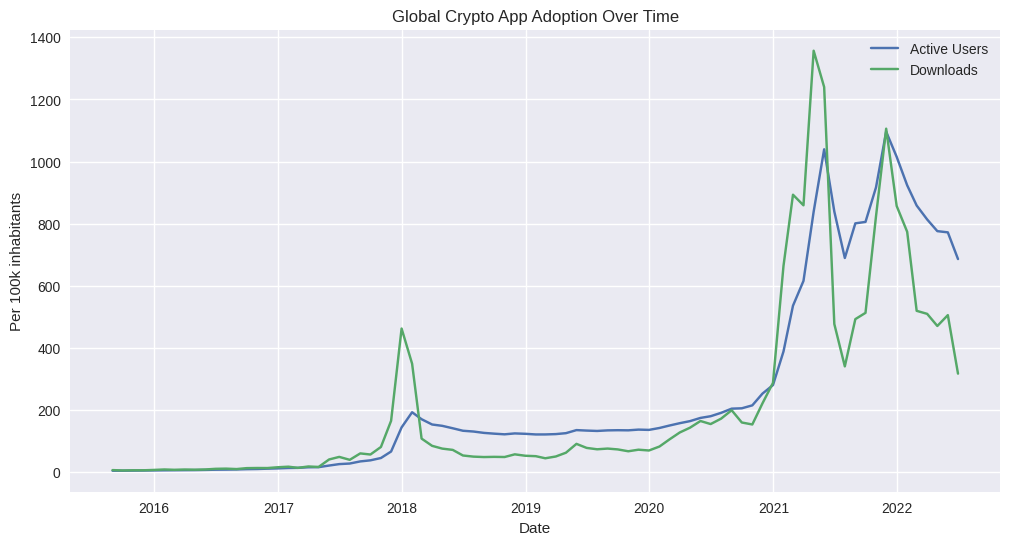

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('CryptoAdaption_for_100,000inhabitants.csv', skiprows=3)
print("Original columns:", df.columns.tolist())
print("Number of columns:", len(df.columns))

if len(df.columns) == 6:
    df.columns = [
        'Unnamed',  # Extra column (often empty)
        'ISO2',
        'Country',
        'Date',
        'Active_Users_per_100k',
        'Downloads_per_100k'
    ]
    df = df.drop(columns=['Unnamed'])  # Remove the extra column
elif len(df.columns) == 5:
    df.columns = [
        'ISO2',
        'Country',
        'Date',
        'Active_Users_per_100k',
        'Downloads_per_100k'
    ]
else:
    raise ValueError(f"Unexpected number of columns: {len(df.columns)}")

# Clean date column
df['Date'] = pd.to_datetime(df['Date'].str.split(' ').str[0], dayfirst=True)

# ====================
# 1. Basic Overview
# ====================
print("\n=== BASIC DATA OVERVIEW ===")
print(f"Time period: {df['Date'].min().date()} to {df['Date'].max().date()}")
print(f"Countries: {df['Country'].nunique()}")
print(f"Total observations: {len(df)}")
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

# ====================
# 2. Temporal Analysis
# ====================
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Active_Users_per_100k',
             data=df.groupby('Date')['Active_Users_per_100k'].mean().reset_index(),
             label='Active Users')
sns.lineplot(x='Date', y='Downloads_per_100k',
             data=df.groupby('Date')['Downloads_per_100k'].mean().reset_index(),
             label='Downloads')
plt.title('Global Crypto App Adoption Over Time')
plt.ylabel('Per 100k inhabitants')
plt.legend()
plt.show()

# [Rest of your EDA code remains the same...]

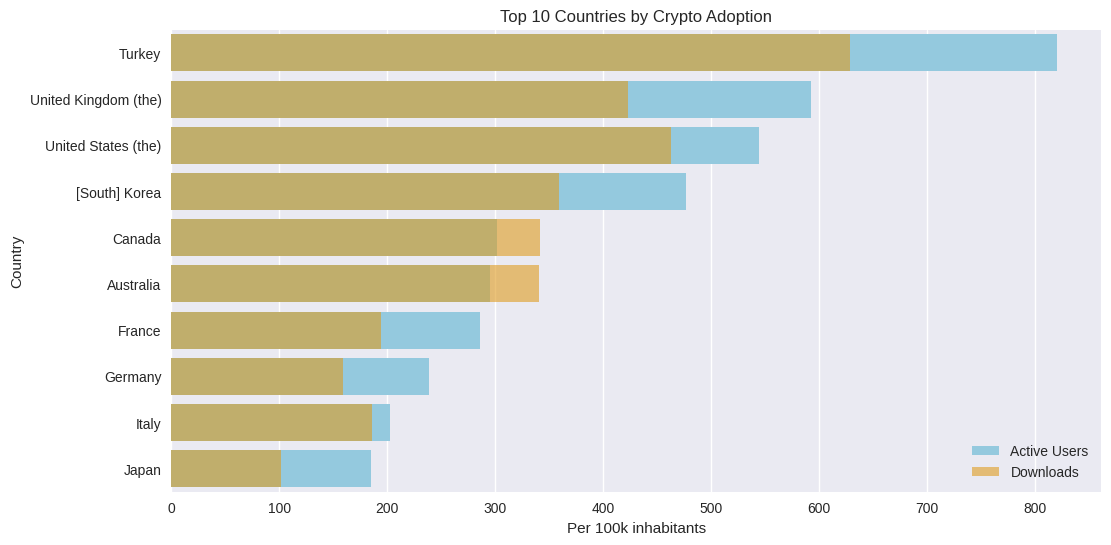

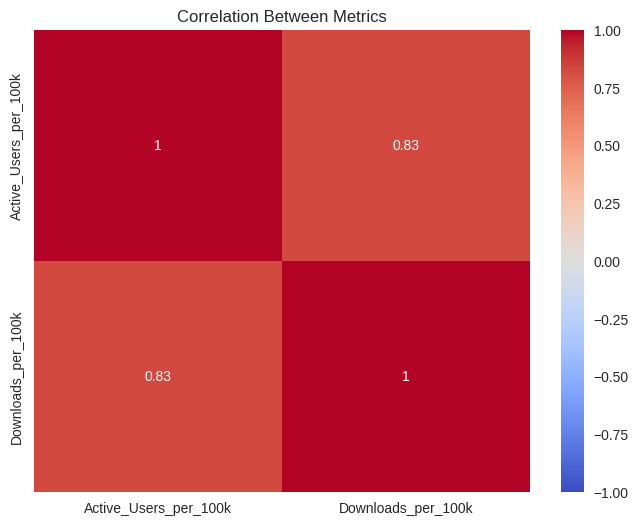

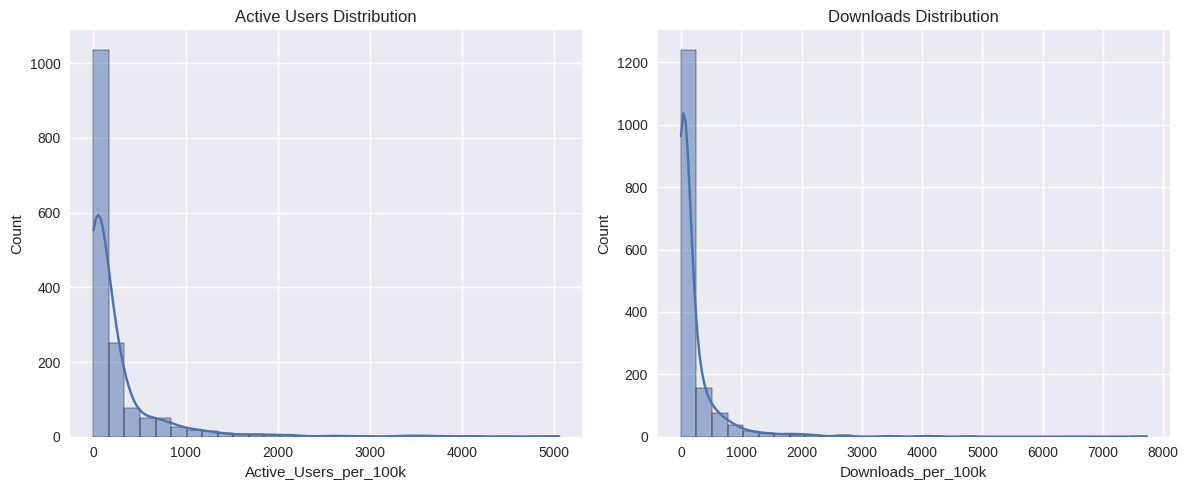

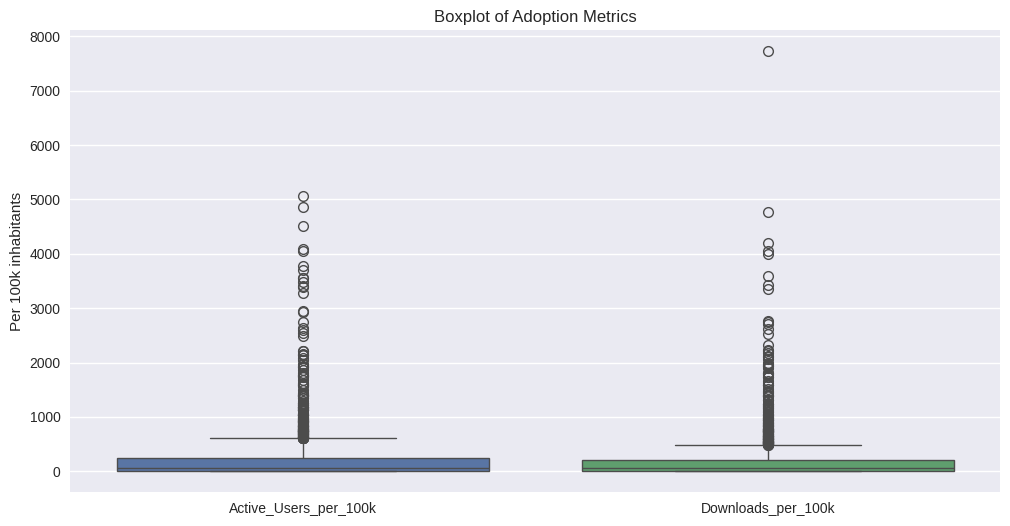


Peak Adoption Months:
 Date
2021-11    1096.308589
2021-05    1039.582674
2021-12    1015.394079
2022-01     923.712347
2021-10     916.966147
Freq: M, Name: Active_Users_per_100k, dtype: float64


In [ ]:

# ====================
# 3. Country Analysis
# ====================
top_countries = df.groupby('Country')[['Active_Users_per_100k', 'Downloads_per_100k']]\
                .mean().sort_values('Active_Users_per_100k', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries['Active_Users_per_100k'],
            y=top_countries.index,
            color='skyblue', label='Active Users')
sns.barplot(x=top_countries['Downloads_per_100k'],
            y=top_countries.index,
            color='orange', label='Downloads', alpha=0.6)
plt.title('Top 10 Countries by Crypto Adoption')
plt.xlabel('Per 100k inhabitants')
plt.legend()
plt.show()

# ====================
# 4. Correlation Analysis
# ====================
corr = df[['Active_Users_per_100k', 'Downloads_per_100k']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Metrics')
plt.show()

# ====================
# 5. Distribution Analysis
# ====================
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['Active_Users_per_100k'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Active Users Distribution')
sns.histplot(df['Downloads_per_100k'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Downloads Distribution')
plt.tight_layout()
plt.show()

# ====================
# 6. Outlier Detection
# ====================
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Active_Users_per_100k', 'Downloads_per_100k']])
plt.title('Boxplot of Adoption Metrics')
plt.ylabel('Per 100k inhabitants')
plt.show()

# ====================
# 7. Advanced Insights
# ====================
# Growth rate calculation
df['growth_rate'] = df.groupby('Country')['Active_Users_per_100k'].pct_change() * 100

# Peak adoption periods
peak_months = df.groupby(df['Date'].dt.to_period('M'))['Active_Users_per_100k']\
              .mean().nlargest(5)
print("\nPeak Adoption Months:\n", peak_months)


Top countries by average active users:
                       Active_Users_per_100k  Downloads_per_100k
Country                                                        
Turkey                           820.005943          628.900966
United Kingdom (the)             592.783280          423.405513
United States (the)              543.894780          462.347180
[South] Korea                    477.067112          358.719023
Canada                           301.445749          341.147817
Australia                        295.624278          340.855596
France                           285.904745          194.427155
Germany                          238.986930          159.067272
Italy                            202.609229          186.285841
Japan                            184.791754          101.718707


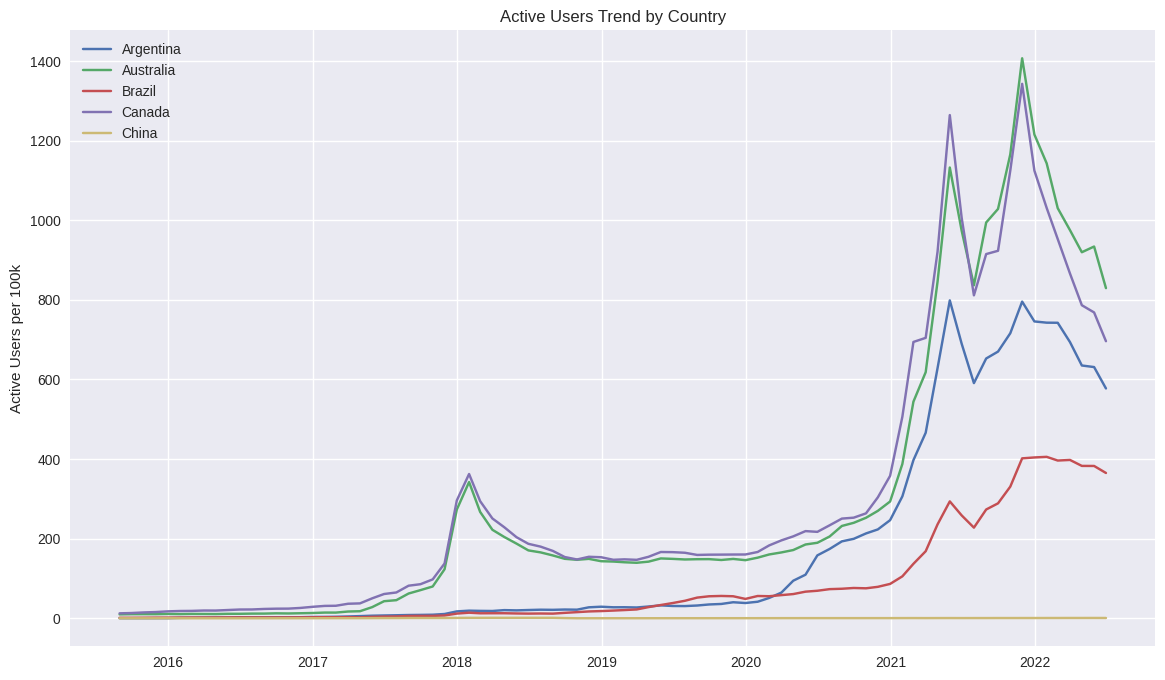

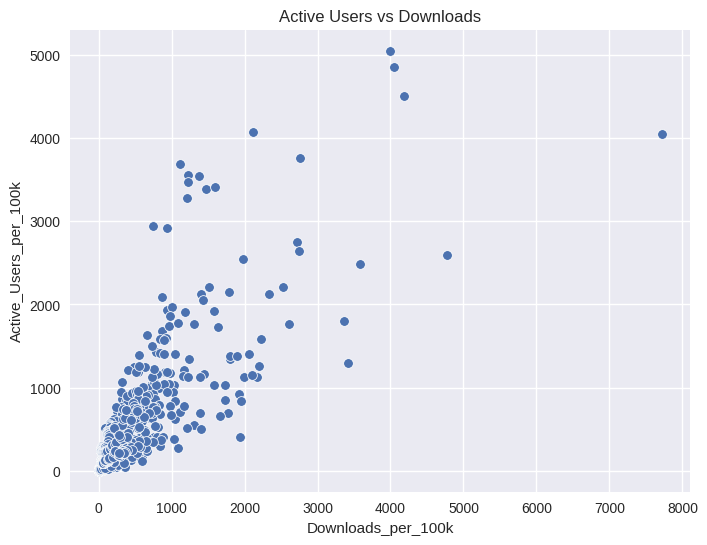


Correlation matrix:
                        Active_Users_per_100k  Downloads_per_100k
Active_Users_per_100k               1.000000            0.830069
Downloads_per_100k                  0.830069            1.000000


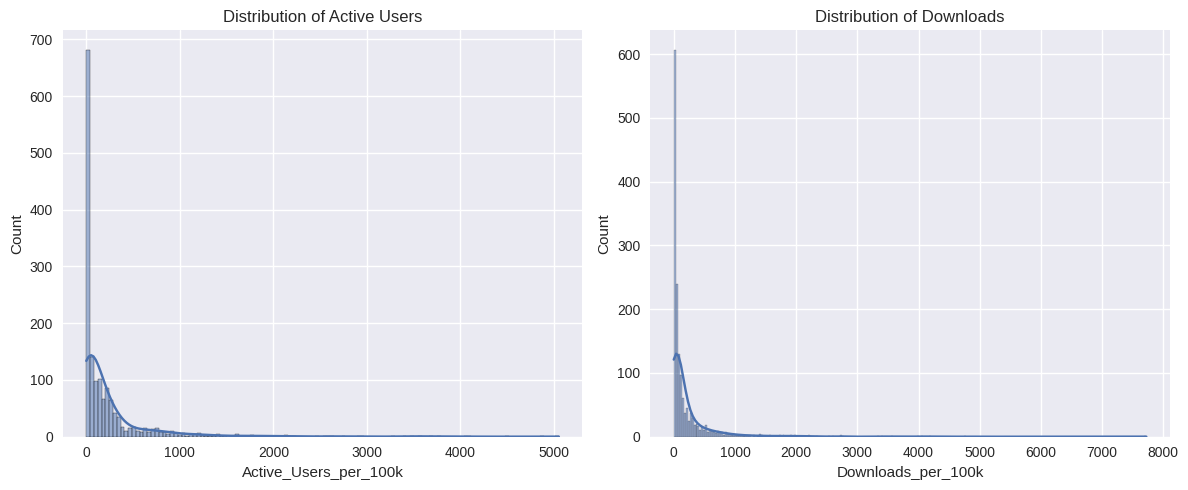

<Figure size 1000x500 with 0 Axes>

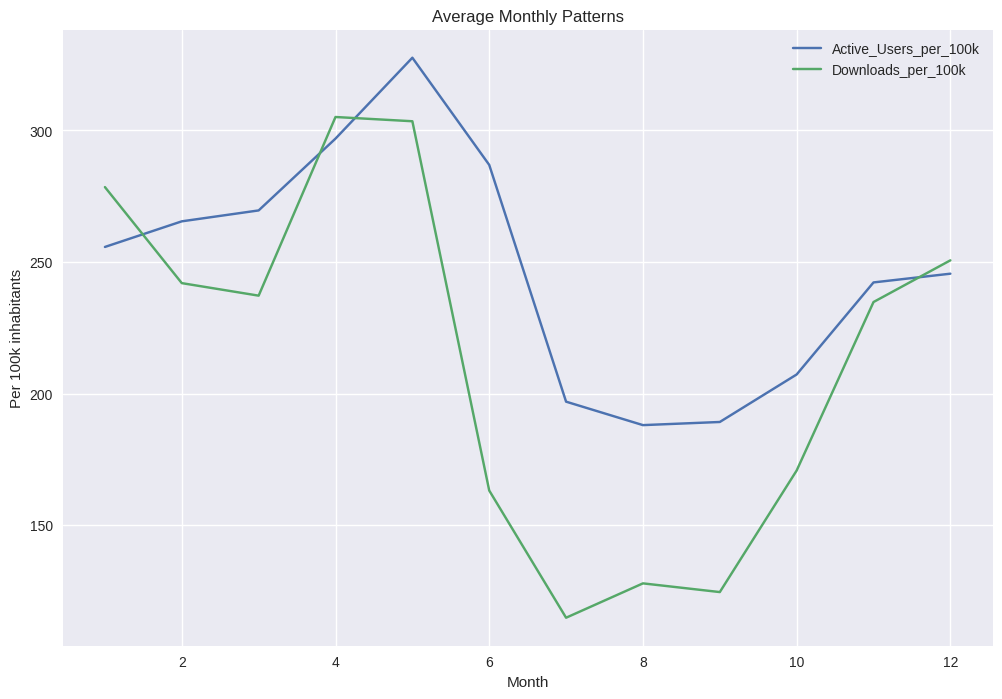

In [ ]:
# ====================
# 3. Country-Level Analysis
# ====================
# Top countries by average adoption
top_countries = df.groupby('Country')[['Active_Users_per_100k', 'Downloads_per_100k']].mean().sort_values('Active_Users_per_100k', ascending=False)
print("\nTop countries by average active users:\n", top_countries.head(10))

# Country trends visualization
plt.figure(figsize=(14, 8))
for country in df['Country'].unique()[:5]:  # Plot first 5 countries for clarity
    country_data = df[df['Country'] == country]
    plt.plot(country_data['Date'], country_data['Active_Users_per_100k'], label=country)
plt.title('Active Users Trend by Country')
plt.ylabel('Active Users per 100k')
plt.legend()
plt.show()

# ====================
# 4. Correlation Analysis
# ====================
# Scatter plot of active users vs downloads
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Downloads_per_100k', y='Active_Users_per_100k', data=df)
plt.title('Active Users vs Downloads')
plt.show()

# Correlation matrix
corr_matrix = df[['Active_Users_per_100k', 'Downloads_per_100k']].corr()
print("\nCorrelation matrix:\n", corr_matrix)

# ====================
# 5. Distribution Analysis
# ====================
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Active_Users_per_100k'], kde=True)
plt.title('Distribution of Active Users')

plt.subplot(1, 2, 2)
sns.histplot(df['Downloads_per_100k'], kde=True)
plt.title('Distribution of Downloads')
plt.tight_layout()
plt.show()

# ====================
# 6. Seasonal Analysis
# ====================
# Extract month and year for seasonal analysis
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Monthly patterns
monthly_pattern = df.groupby('Month')[['Active_Users_per_100k', 'Downloads_per_100k']].mean()
plt.figure(figsize=(10, 5))
monthly_pattern.plot()
plt.title('Average Monthly Patterns')
plt.ylabel('Per 100k inhabitants')
plt.show()

In [ ]:
print("Sample of processed data:")
print(latest_data[['Country', 'ISO2', 'Active_Users_per_100k', 'Downloads_per_100k']].head())
print("\nData types:")
print(latest_data.dtypes)
# Validate ISO2 codes
invalid_codes = latest_data[~latest_data['ISO2'].str.match('^[A-Z]{2}$')]
if not invalid_codes.empty:
    print("Invalid ISO2 codes found:")
    print(invalid_codes[['Country', 'ISO2']])
else:
    print("All ISO2 codes are valid 2-letter codes")

Sample of processed data:
     Country ISO2  Active_Users_per_100k  Downloads_per_100k
0  Argentina   AR               577.4123            352.5702
1  Australia   AU               829.4899            398.8577
2     Brazil   BR               365.0605            309.3235
3     Canada   CA               696.1353            344.0690
4      China   CN                 0.7226              0.1999

Data types:
Country                          object
ISO2                             object
Date                     datetime64[ns]
Active_Users_per_100k           float64
Downloads_per_100k              float64
dtype: object
All ISO2 codes are valid 2-letter codes


In [ ]:
# Get total number of unique countries
total_countries = latest_data[['Country', 'ISO2']].drop_duplicates()
print(f"\nTotal number of countries: {total_countries.shape[0]}")

# Display country names and ISO2 codes
print("\nList of countries and their ISO2 codes:")
for _, row in total_countries.sort_values('Country').iterrows():
    print(f"{row['Country']} - {row['ISO2']}")



Total number of countries: 19

List of countries and their ISO2 codes:
Argentina - AR
Australia - AU
Brazil - BR
Canada - CA
China - CN
France - FR
Germany - DE
India - IN
Indonesia - ID
Italy - IT
Japan - JP
Mexico - MX
Russia - RU
Saudi Arabia - SA
South Africa - ZA
Turkey - TR
United Kingdom (the) - GB
United States (the) - US
[South] Korea - KR


In [ ]:
# Install pycountry (only needed once)
!pip install pycountry

# 1. Import libraries
import pandas as pd
import plotly.express as px
import os
from IPython.display import display, HTML
import pycountry
from google.colab import files

# 2. Load and clean data with error handling
try:
    df = pd.read_csv('CryptoAdaption_for_100,000inhabitants.csv', skiprows=3)
    print("Data loaded successfully.")
except Exception as e:
    print(f"Error loading data: {e}")
    raise

# Renaming and cleaning columns
df.columns = ['Unnamed', 'ISO2', 'Country', 'Date', 'Active_Users_per_100k', 'Downloads_per_100k']
df = df.drop(columns=['Unnamed'])

# Convert dates with better error handling
try:
    df['Date'] = pd.to_datetime(df['Date'].str.split(' ').str[0], dayfirst=True, errors='coerce')
    print("Dates converted successfully.")
except Exception as e:
    print(f"Error in date conversion: {e}")
    raise

# Convert metrics to numeric, forcing errors to NaN (to handle non-numeric values)
df['Active_Users_per_100k'] = pd.to_numeric(df['Active_Users_per_100k'], errors='coerce')
df['Downloads_per_100k'] = pd.to_numeric(df['Downloads_per_100k'], errors='coerce')

# Get the latest data per country (based on the most recent date)
latest_data = df.sort_values('Date').groupby('Country').last().reset_index()

# Clean and validate ISO2 codes (check for invalid codes)
latest_data['ISO2'] = latest_data['ISO2'].str.strip().str.upper()
latest_data = latest_data.dropna(subset=['ISO2'])  # Drop rows with missing ISO2 codes

# ISO2 to ISO3 conversion function with better error handling
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        print(f"Warning: ISO2 code '{code}' could not be converted to ISO3.")
        return None

# Apply ISO2 to ISO3 conversion
latest_data['ISO3'] = latest_data['ISO2'].apply(iso2_to_iso3)

# Drop rows with invalid ISO3 codes or missing metric values
latest_data = latest_data.dropna(subset=['ISO3', 'Active_Users_per_100k', 'Downloads_per_100k'])

print(f"Data after cleaning: {len(latest_data)} rows remaining.")

# 3. Create map function
def create_map(data, metric, title):
    fig = px.choropleth(
        data,
        locations="ISO3",
        locationmode="ISO-3",
        color=metric,
        hover_name="Country",
        hover_data={metric: ":.1f"},
        color_continuous_scale='Plasma' if metric == 'Active_Users_per_100k' else 'Viridis',
        range_color=(0.1, data[metric].max() * 1.1),
        title=title,
        labels={metric: title.split("(")[0].strip()}
    )
    fig.update_geos(
        showcountries=True,
        countrycolor="black",
        showframe=False
    )
    fig.update_layout(
        geo=dict(showcoastlines=True, coastlinecolor="LightGray", showland=True, landcolor="whitesmoke"),
        title_font_size=16,
        geo_resolution=110
    )
    return fig

# 4. Generate and display maps
print("Generating maps...")
fig1 = create_map(latest_data, 'Active_Users_per_100k', "Active Users (per 100k)")
fig2 = create_map(latest_data, 'Downloads_per_100k', "Downloads (per 100k)")

# Display maps in the notebook
display(HTML(fig1.to_html(full_html=False, include_plotlyjs='cdn')))
display(HTML(fig2.to_html(full_html=False, include_plotlyjs='cdn')))

# 5. Save maps as HTML
output_dir = "crypto_maps"
os.makedirs(output_dir, exist_ok=True)
html_path = os.path.join(output_dir, "crypto_adoption.html")
with open(html_path, "w") as f:
    f.write(fig1.to_html(full_html=True, include_plotlyjs='cdn'))
    f.write(fig2.to_html(full_html=False, include_plotlyjs=False))

# Provide download link for the HTML file
files.download(html_path)

print(f"✅ Success! Maps saved to: {os.path.abspath(html_path)}")


Data loaded successfully.
Dates converted successfully.
Data after cleaning: 19 rows remaining.
Generating maps...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Success! Maps saved to: /content/crypto_maps/crypto_adoption.html


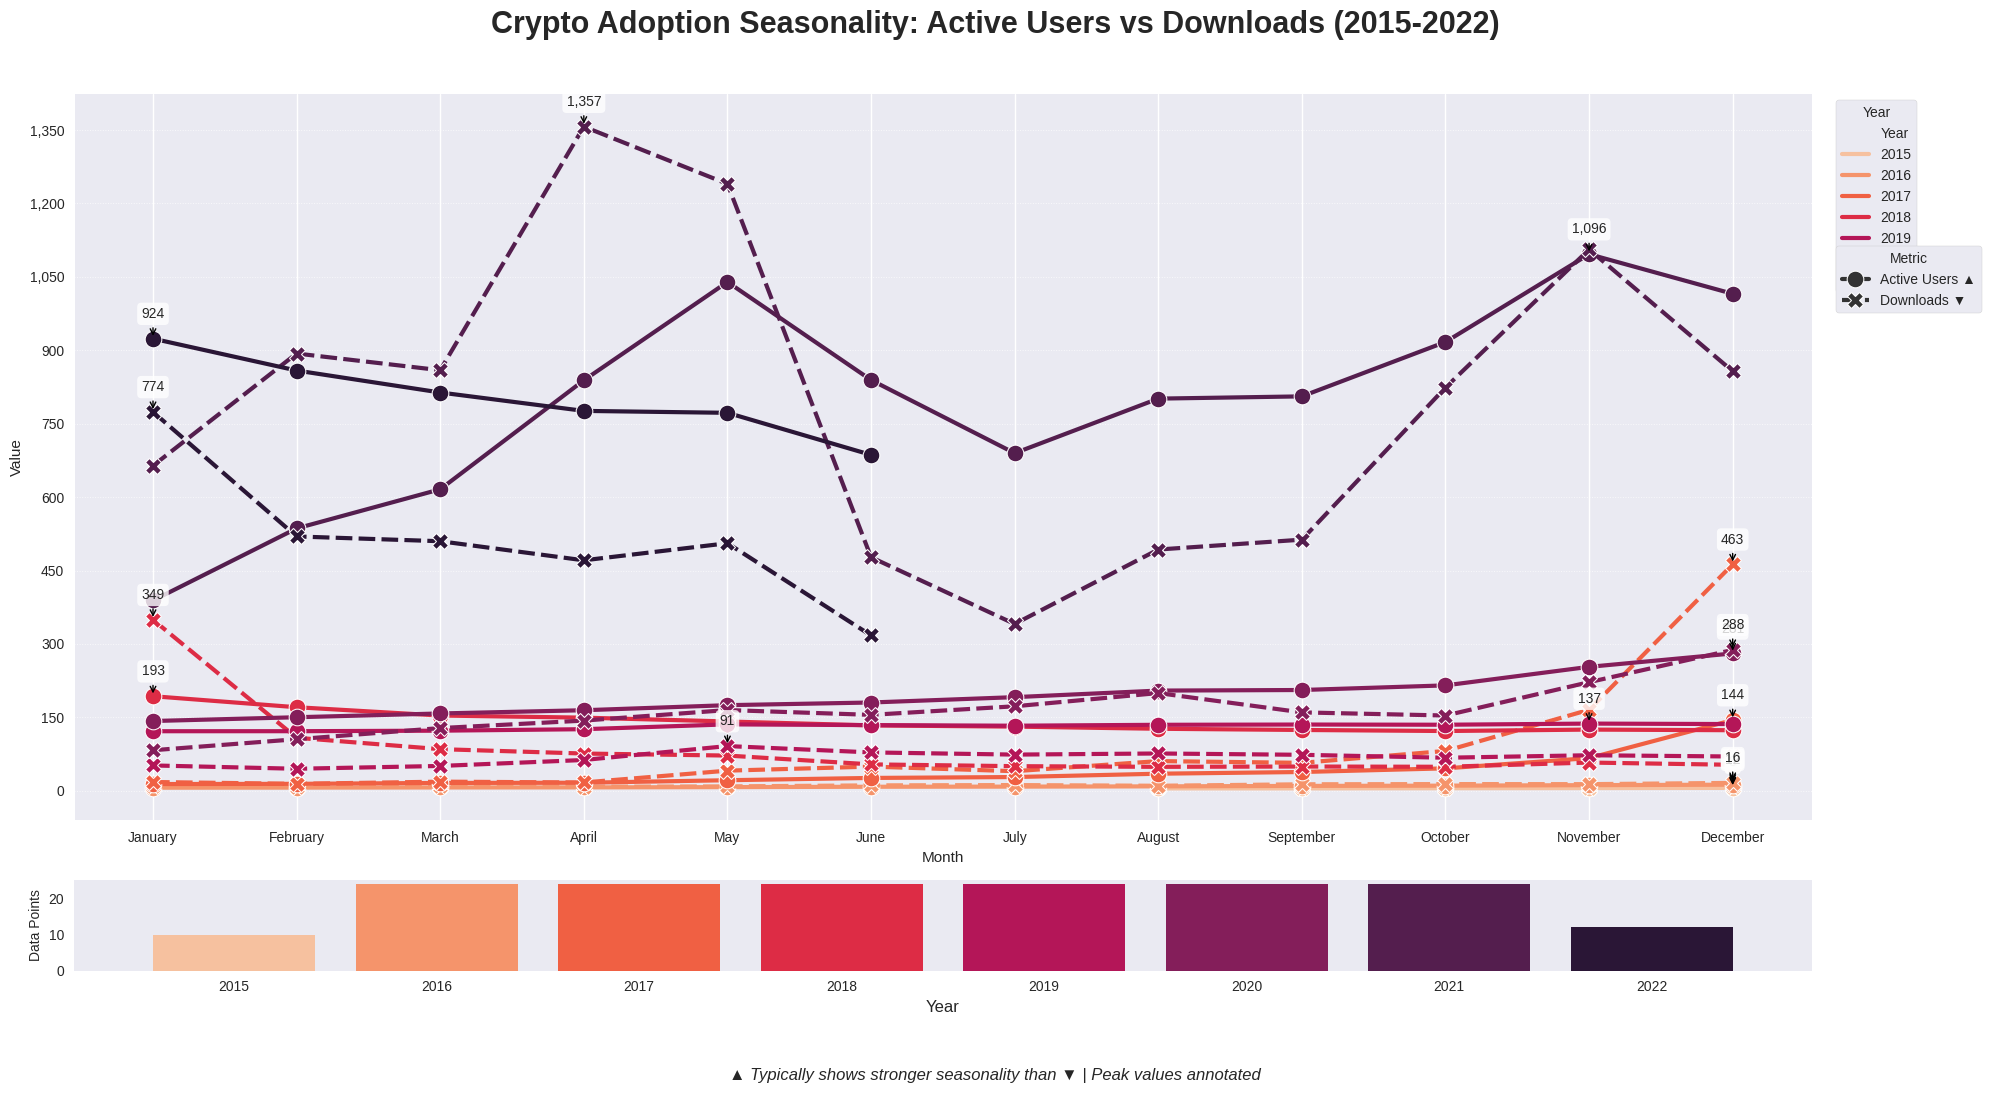

In [ ]:
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

# --- Data Preparation ---
melted = monthly_avg.melt(
    id_vars=['Year', 'Month'],
    value_vars=['Active_Users_per_100k', 'Downloads_per_100k'],
    var_name='Metric',
    value_name='Value'
)

# Human-readable names and ordering
metric_names = {
    'Active_Users_per_100k': 'Active Users ▲',
    'Downloads_per_100k': 'Downloads ▼'  # Triangles indicate typical relationship
}
melted['Metric'] = melted['Metric'].map(metric_names)
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# --- Plot Design ---
plt.figure(figsize=(20, 10))
gs = plt.GridSpec(2, 1, height_ratios=[8, 1])  # Main plot + timeline

# --- Main Plot ---
ax = plt.subplot(gs[0])
sns.lineplot(
    x='Month',
    y='Value',
    data=melted,
    hue='Year',
    style='Metric',
    palette=sns.color_palette("rocket_r", n_colors=len(melted['Year'].unique())),
    markers={'Active Users ▲': 'o', 'Downloads ▼': 'X'},
    style_order=['Active Users ▲', 'Downloads ▼'],
    linewidth=3,
    markersize=12,
    ax=ax
)

# --- Enhanced Styling ---
# Y-axis formatting
ax.yaxis.set_major_formatter(thousand_fmt)
ax.yaxis.set_major_locator(MaxNLocator(10))

# Grid and spines
ax.grid(True, which='major', axis='y', linestyle=':', linewidth=0.7, alpha=0.7)
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['left', 'bottom']].set_linewidth(1.5)

# --- Annotations ---
# Highlight max points
for (year, metric), group in melted.groupby(['Year', 'Metric']):
    max_val = group['Value'].max()
    max_month = group.loc[group['Value'].idxmax(), 'Month']
    ax.annotate(
        f'{max_val:,.0f}',
        xy=(max_month, max_val),
        xytext=(0, 15),
        textcoords='offset points',
        ha='center',
        fontsize=10,
        bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='none', alpha=0.8),
        arrowprops=dict(arrowstyle='->', lw=1)
    )

# --- Timeline Context ---
ax_hist = plt.subplot(gs[1])
year_counts = melted['Year'].value_counts().sort_index()
ax_hist.bar(
    year_counts.index.astype(str),
    year_counts.values,
    color=sns.color_palette("rocket_r", n_colors=len(year_counts)) #Fixed: Indentation was incorrect
)
ax_hist.set_xlabel('Year', fontsize=12)
ax_hist.set_ylabel('Data Points', fontsize=10)
ax_hist.grid(False)
ax_hist.spines[['top', 'right', 'left']].set_visible(False)

# --- Legend Design ---
handles, labels = ax.get_legend_handles_labels()
legend1 = ax.legend(
    handles[:len(melted['Year'].unique())],
    labels[:len(melted['Year'].unique())],
    title='Year',
    frameon=True,
    framealpha=1,
    loc='upper left',
    bbox_to_anchor=(1.01, 1)
)
legend2 = ax.legend(
    handles[-2:],
    labels[-2:],
    title='Metric',
    frameon=True,
    framealpha=1,
    loc='upper left',
    bbox_to_anchor=(1.01, 0.8)
)
ax.add_artist(legend1)

# --- Final Touches ---
plt.suptitle('Crypto Adoption Seasonality: Active Users vs Downloads (2015-2022)',
            y=1.02, fontsize=22, fontweight='bold')
plt.figtext(0.5, -0.05,
           "▲ Typically shows stronger seasonality than ▼ | Peak values annotated",
           ha="center", fontsize=12, style='italic')
plt.tight_layout()

# Add logo (example coordinates)
#plt.figimage(logo_img, xo=1750, yo=1650, alpha=0.2, zorder=1)  # Replace with actual logo #Commented out as logo_img is not defined

plt.show()

<ipython-input-29-dc001b539046>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




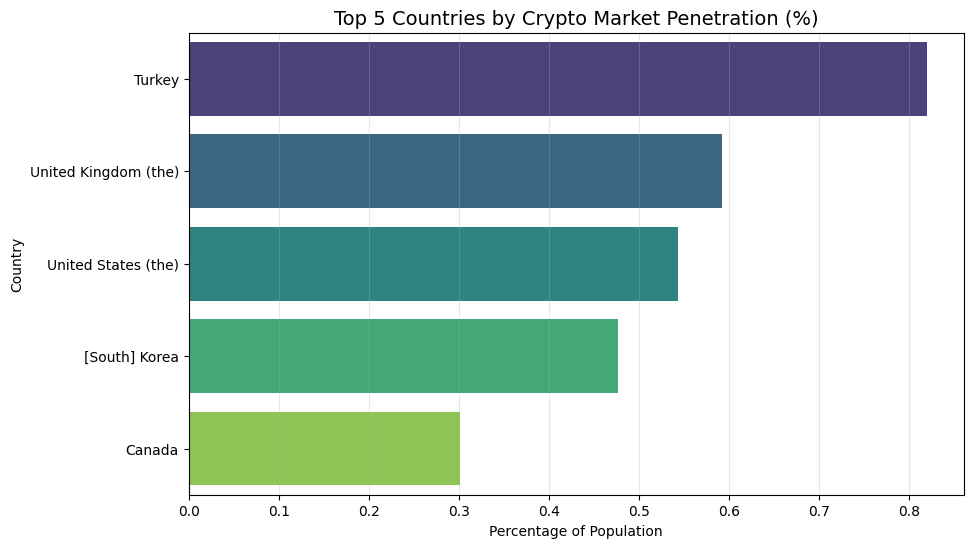

In [ ]:
# Calculate market penetration (users per capita)
df['Penetration_Ratio'] = df['Active_Users_per_100k'] / 100000 * 100  # Convert to percentage

# Top 5 countries by highest average penetration
top_penetration = df.groupby('Country')['Penetration_Ratio'].mean().nlargest(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_penetration.values, y=top_penetration.index, palette="viridis")
plt.title("Top 5 Countries by Crypto Market Penetration (%)", fontsize=14)
plt.xlabel("Percentage of Population")
plt.grid(axis='x', alpha=0.3)
plt.show()

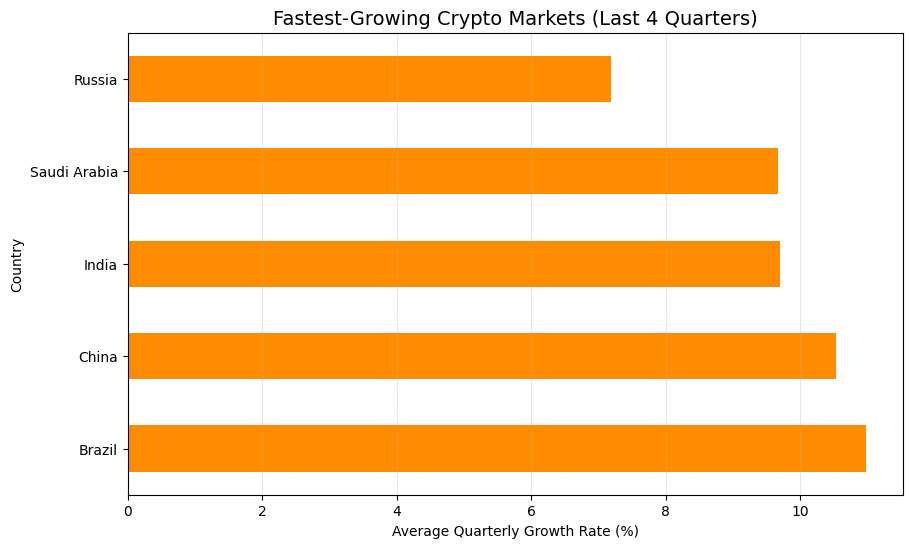

In [ ]:
# Calculate quarterly growth acceleration
df['Quarter'] = df['Date'].dt.to_period('Q')
velocity = df.groupby(['Country', 'Quarter'])['Active_Users_per_100k'].mean().unstack().pct_change(axis=1) * 100

# Plot fastest-growing countries
fastest_growth = velocity.iloc[:, -4:].mean(axis=1).nlargest(5)  # Last 4 quarters

plt.figure(figsize=(10, 6))
fastest_growth.plot(kind='barh', color='darkorange')
plt.title("Fastest-Growing Crypto Markets (Last 4 Quarters)", fontsize=14)
plt.xlabel("Average Quarterly Growth Rate (%)")
plt.grid(axis='x', alpha=0.3)
plt.show()

<ipython-input-31-152f6f3aaf78>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




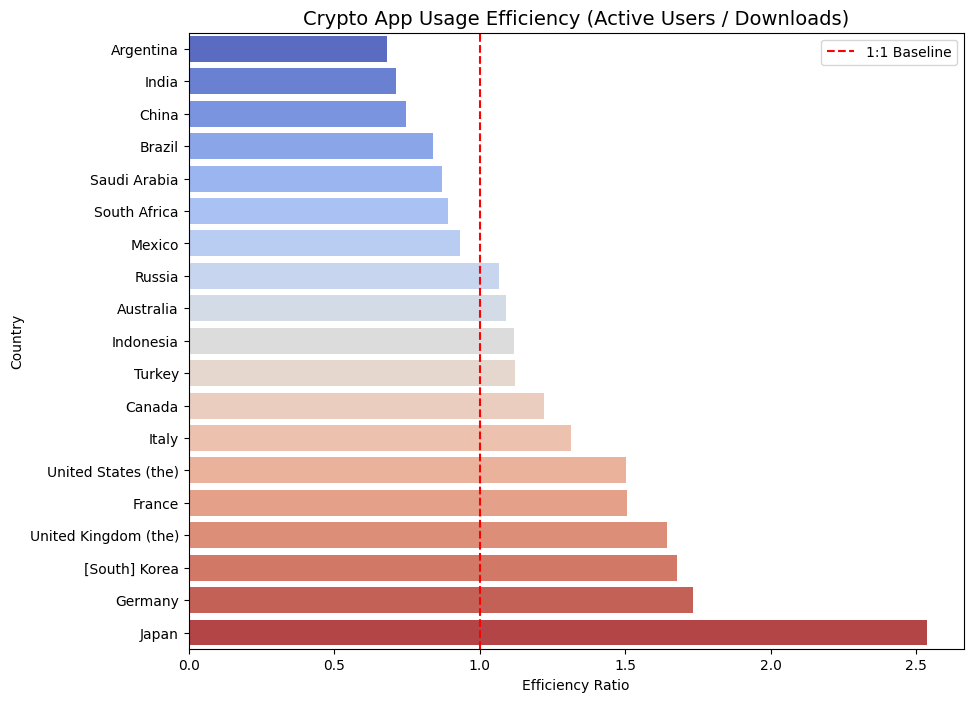

In [ ]:
df['Usage_Efficiency'] = df['Active_Users_per_100k'] / df['Downloads_per_100k']

# Countries with highest/lowest efficiency
efficiency = df.groupby('Country')['Usage_Efficiency'].mean().sort_values()

plt.figure(figsize=(10, 8))
sns.barplot(x=efficiency.values, y=efficiency.index, palette="coolwarm")
plt.title("Crypto App Usage Efficiency (Active Users / Downloads)", fontsize=14)
plt.xlabel("Efficiency Ratio")
plt.axvline(x=1, color='red', linestyle='--', label="1:1 Baseline")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime as dt

def create_enhanced_dashboard(df):
    # Create styled figure with tabs
    fig = make_subplots(
        rows=2, cols=1,
        shared_xaxes=True,
        vertical_spacing=0.1,
        subplot_titles=(
            "<b>Active Users per 100k</b>",
            "<b>Downloads per 100k</b>"
        ),
        specs=[[{"secondary_y": False}], [{"secondary_y": False}]]
    )

    # Color palette
    colors = px.colors.qualitative.Dark24

    # Add traces for each country with enhanced styling
    for i, country in enumerate(df['Country'].unique()):
        country_df = df[df['Country'] == country]

        # Active Users trace with custom styling
        fig.add_trace(
            go.Scatter(
                x=country_df['Date'],
                y=country_df['Active_Users_per_100k'],
                name=country,
                mode='lines+markers',
                marker=dict(
                    size=6,
                    symbol='circle',
                    line=dict(width=1, color='DarkSlateGrey')
                ),
                line=dict(width=2.5),
                opacity=0.9,
                visible=True,
                hovertemplate=(
                    f"<b>{country}</b><br>"
                    "<b>%{x|%b %Y}</b><br>"
                    "Active Users: <b>%{y:,.0f}</b>"
                    "<extra></extra>"
                ),
                legendgroup=country
            ),
            row=1, col=1
        )

        # Downloads trace with different styling
        fig.add_trace(
            go.Scatter(
                x=country_df['Date'],
                y=country_df['Downloads_per_100k'],
                name=country,
                mode='lines+markers',
                marker=dict(
                    size=6,
                    symbol='diamond',
                    line=dict(width=1, color='DarkSlateGrey')
                ),
                line=dict(width=2.5, dash='dot'),
                opacity=0.9,
                visible=True,
                hovertemplate=(
                    f"<b>{country}</b><br>"
                    "<b>%{x|%b %Y}</b><br>"
                    "Downloads: <b>%{y:,.0f}</b>"
                    "<extra></extra>"
                ),
                legendgroup=country,
                showlegend=False
            ),
            row=2, col=1
        )

    # Create annotation for last update
    last_date = df['Date'].max().strftime('%B %Y')

    # Enhanced layout configuration
    fig.update_layout(
        height=900,
        title=dict(
            text="<b>APP USAGE ANALYTICS DASHBOARD</b>",
            font=dict(size=24, family="Arial Black", color="#2a3f5f"),
            x=0.5,
            xanchor="center",
            y=0.97,
            yanchor="top"
        ),
        hoverlabel=dict(
            bgcolor="white",
            font_size=12,
            font_family="Arial"
        ),
        legend=dict(
            title=dict(text="<b>SELECT COUNTRIES:</b>"),
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1,
            itemsizing="constant",
            itemwidth=30
        ),
        margin=dict(l=80, r=80, t=120, b=80),
        plot_bgcolor="rgba(245,245,245,1)",
        paper_bgcolor="rgba(255,255,255,1)",
        font=dict(family="Arial"),
        annotations=[
            dict(
                text=f"<i>Last updated: {last_date}</i>",
                showarrow=False,
                xref="paper",
                yref="paper",
                x=0.5,
                y=-0.15,
                font=dict(size=10, color="gray")
            )
        ],
        updatemenus=[
            dict(
                buttons=list([
                    dict(
                        label="All Countries",
                        method="update",
                        args=[{"visible": [True]*len(fig.data)}]
                    ),
                    dict(
                        label="Reset Views",
                        method="relayout",
                        args=["xaxis.range", [df['Date'].min(), df['Date'].max()]]
                    )
                ] + [
                    dict(
                        label=country,
                        method="update",
                        args=[{
                            "visible": [True if trace.name == country else False for trace in fig.data]
                        }]
                    )
                    for country in df['Country'].unique()
                ]),
                direction="down",
                showactive=True,
                x=0.1,
                xanchor="left",
                y=1.15,
                yanchor="top",
                bgcolor="rgba(255,255,255,0.9)",
                bordercolor="#e1e1e1",
                borderwidth=1,
                font=dict(size=12)
            )
        ]
    )

    # Axis formatting
    fig.update_xaxes(
        row=2, col=1,
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all", label="All")
            ]),
            bgcolor="rgba(240,240,240,0.7)",
            bordercolor="#d3d3d3",
            font=dict(size=10)
        ),
        rangeslider=dict(visible=True),
        type="date"
    )

    fig.update_yaxes(
        title_text="<b>Users per 100k</b>",
        row=1, col=1,
        gridcolor="rgba(211,211,211,0.3)"
    )

    fig.update_yaxes(
        title_text="<b>Downloads per 100k</b>",
        row=2, col=1,
        gridcolor="rgba(211,211,211,0.3)"
    )

    # Add custom shapes for better visual separation
    fig.update_layout(
        shapes=[
            dict(
                type="rect",
                xref="paper",
                yref="paper",
                x0=0,
                y0=0,
                x1=1,
                y1=1,
                fillcolor="rgba(0,0,0,0.03)",
                line=dict(width=0),
                layer="below"
            ),
            dict(
                type="line",
                xref="paper",
                yref="paper",
                x0=0,
                y0=0.465,
                x1=1,
                y1=0.465,
                line=dict(color="rgba(0,0,0,0.1)", width=1, dash="dot"),
                layer="below"
            )
        ]
    )

    return fig

# Create and show the enhanced dashboard
enhanced_fig = create_enhanced_dashboard(df)
enhanced_fig.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.cluster import KMeans

# Load data
df = pd.read_csv('CryptoAdaption_for_100,000inhabitants.csv', skiprows=3)
df.columns = ['Index', 'ISO2', 'Country', 'Date', 'Active_Users', 'Downloads']
df['Date'] = pd.to_datetime(df['Date'].str.split(' ').str[0], dayfirst=True)
df = df.drop('Index', axis=1)

# Extract time features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.to_period('Q')

# List of all 19 countries
countries = df['Country'].unique()
print("Countries:", countries)

Countries: ['Argentina' 'Australia' 'Brazil' 'Canada' 'China' 'Germany' 'France'
 'United Kingdom (the)' 'Indonesia' 'India' 'Italy' 'Japan'
 '[South] Korea' 'Mexico' 'Russia' 'Saudi Arabia' 'Turkey'
 'United States (the)' 'South Africa']


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates

In [ ]:
# Set the style using modern Matplotlib commands
sns.set_style("darkgrid")  # Dark background with grid
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
sns.set_palette("husl")  # Color palette

In [ ]:
def load_data(filepath):
    # Read CSV file
    df = pd.read_csv(filepath, skiprows=3)

    # Rename columns
    df.columns = ['Index', 'ISO2', 'Country', 'Date', 'Active_Users', 'Downloads']

    # Clean date format
    df['Date'] = pd.to_datetime(df['Date'].str.split(' ').str[0], dayfirst=True)

    # Drop unnecessary column
    df = df.drop('Index', axis=1)

    # Extract time features
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Quarter'] = df['Date'].dt.to_period('Q')

    return df


📊 Extreme Cases Summary:


,Metric,Country,Downloads,Active_Users
0,Most Downloads,Turkey,629,820
1,Least Downloads,China,1,0
2,Most Active Users,Turkey,629,820
3,Least Active Users,China,1,0


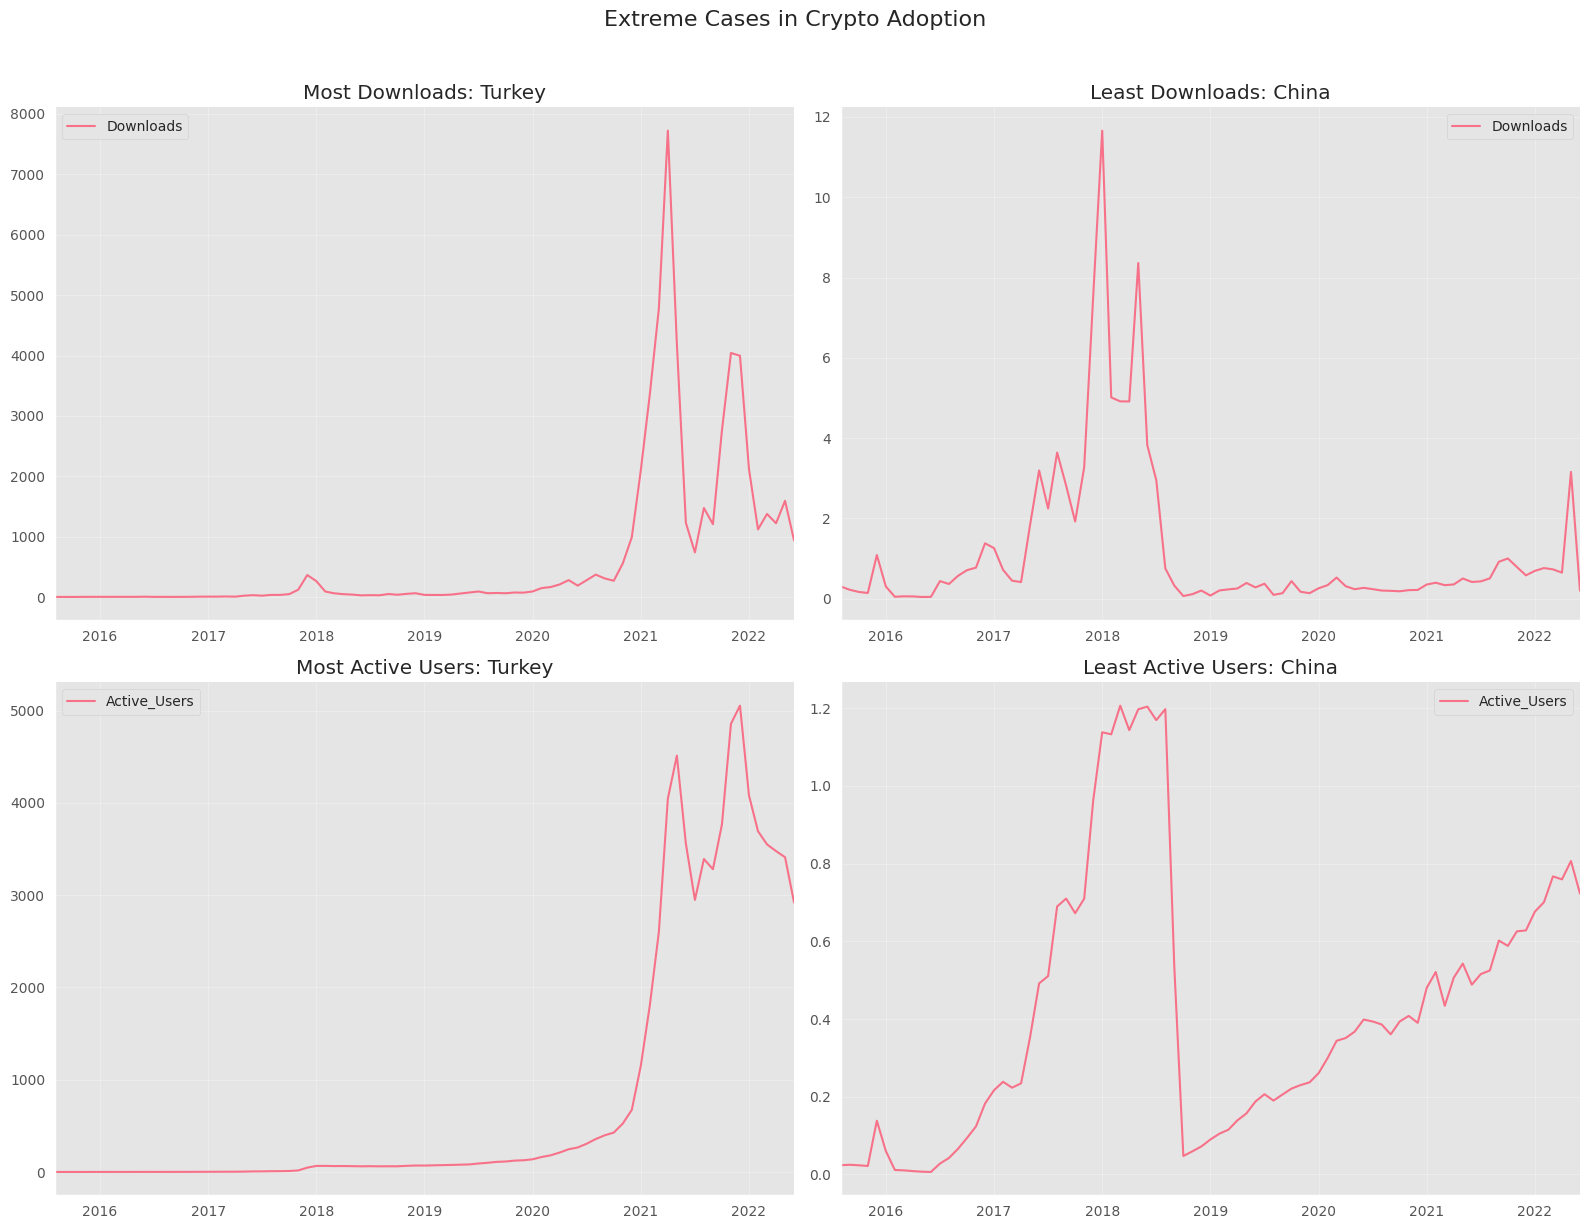


🏆 Top 5 Countries by Downloads:


,Country,Downloads
0,Turkey,629
1,United States (the),462
2,United Kingdom (the),423
3,[South] Korea,359
4,Canada,341



🔻 Bottom 5 Countries by Downloads:


,Country,Downloads
0,China,1
1,India,28
2,Indonesia,65
3,Mexico,74
4,Japan,102


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plot styling
plt.style.use('ggplot')
sns.set_palette("husl")
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.grid'] = True

def load_data(filepath):
    """Load and clean cryptocurrency adoption data"""
    df = pd.read_csv(filepath, skiprows=3)
    df.columns = ['Index', 'ISO2', 'Country', 'Date', 'Active_Users', 'Downloads']
    df['Date'] = pd.to_datetime(df['Date'].str.split(' ').str[0], dayfirst=True)
    return df.drop('Index', axis=1)

def analyze_extremes(df):
    """Identify countries with highest/lowest metrics"""
    # Calculate average metrics per country
    avg_metrics = df.groupby('Country', as_index=False)[['Downloads', 'Active_Users']].mean()

    # Find extremes
    extremes = {
        'Most Downloads': avg_metrics.nlargest(1, 'Downloads'),
        'Least Downloads': avg_metrics.nsmallest(1, 'Downloads'),
        'Most Active Users': avg_metrics.nlargest(1, 'Active_Users'),
        'Least Active Users': avg_metrics.nsmallest(1, 'Active_Users')
    }

    return extremes

def plot_extremes(df, extremes):
    """Visualize the extreme cases"""
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Extreme Cases in Crypto Adoption', fontsize=16, y=1.02)

    # Plot most downloads
    most_dl = extremes['Most Downloads']['Country'].values[0]
    df[df['Country'] == most_dl].plot(x='Date', y='Downloads',
                                    ax=axes[0,0], title=f'Most Downloads: {most_dl}')

    # Plot least downloads
    least_dl = extremes['Least Downloads']['Country'].values[0]
    df[df['Country'] == least_dl].plot(x='Date', y='Downloads',
                                     ax=axes[0,1], title=f'Least Downloads: {least_dl}')

    # Plot most active users
    most_au = extremes['Most Active Users']['Country'].values[0]
    df[df['Country'] == most_au].plot(x='Date', y='Active_Users',
                                    ax=axes[1,0], title=f'Most Active Users: {most_au}')

    # Plot least active users
    least_au = extremes['Least Active Users']['Country'].values[0]
    df[df['Country'] == least_au].plot(x='Date', y='Active_Users',
                                     ax=axes[1,1], title=f'Least Active Users: {least_au}')

    # Format all plots
    for ax in axes.flatten():
        ax.set_xlabel('')
        ax.grid(True, alpha=0.3)
        for spine in ['top', 'right']:
            ax.spines[spine].set_visible(False)

    plt.tight_layout()
    plt.show()

def show_summary_table(extremes):
    """Display summary table of extreme cases"""
    summary = pd.concat([
        extremes['Most Downloads'].assign(Metric='Most Downloads'),
        extremes['Least Downloads'].assign(Metric='Least Downloads'),
        extremes['Most Active Users'].assign(Metric='Most Active Users'),
        extremes['Least Active Users'].assign(Metric='Least Active Users')
    ])[['Metric', 'Country', 'Downloads', 'Active_Users']].reset_index(drop=True)

    print("\n📊 Extreme Cases Summary:")
    display(summary.style
           .format({'Downloads': '{:,.0f}', 'Active_Users': '{:,.0f}'})
           .set_properties(**{'background-color': 'lightblue'},
                          subset=['Downloads', 'Active_Users']))

def show_rankings(df):
    """Display top and bottom rankings"""
    avg_stats = df.groupby('Country', as_index=False)[['Downloads', 'Active_Users']].mean()

    print("\n🏆 Top 5 Countries by Downloads:")
    display(avg_stats.nlargest(5, 'Downloads')[['Country', 'Downloads']]
           .reset_index(drop=True)
           .style.format({'Downloads': '{:,.0f}'})
           .set_properties(**{'background-color': 'lightgreen'}, subset=['Downloads']))

    print("\n🔻 Bottom 5 Countries by Downloads:")
    display(avg_stats.nsmallest(5, 'Downloads')[['Country', 'Downloads']]
           .reset_index(drop=True)
           .style.format({'Downloads': '{:,.0f}'})
           .set_properties(**{'background-color': 'lightcoral'}, subset=['Downloads']))

# Main analysis
df = load_data('CryptoAdaption_for_100,000inhabitants.csv')
extremes = analyze_extremes(df)

# Display results
show_summary_table(extremes)
plot_extremes(df, extremes)
show_rankings(df)

<ipython-input-57-3d95264690a1>:42: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


<ipython-input-57-3d95264690a1>:42: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


<ipython-input-57-3d95264690a1>:42: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


<ipython-input-57-3d95264690a1>:42: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


<ipython-input-57-3d95264690a1>:63: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' a

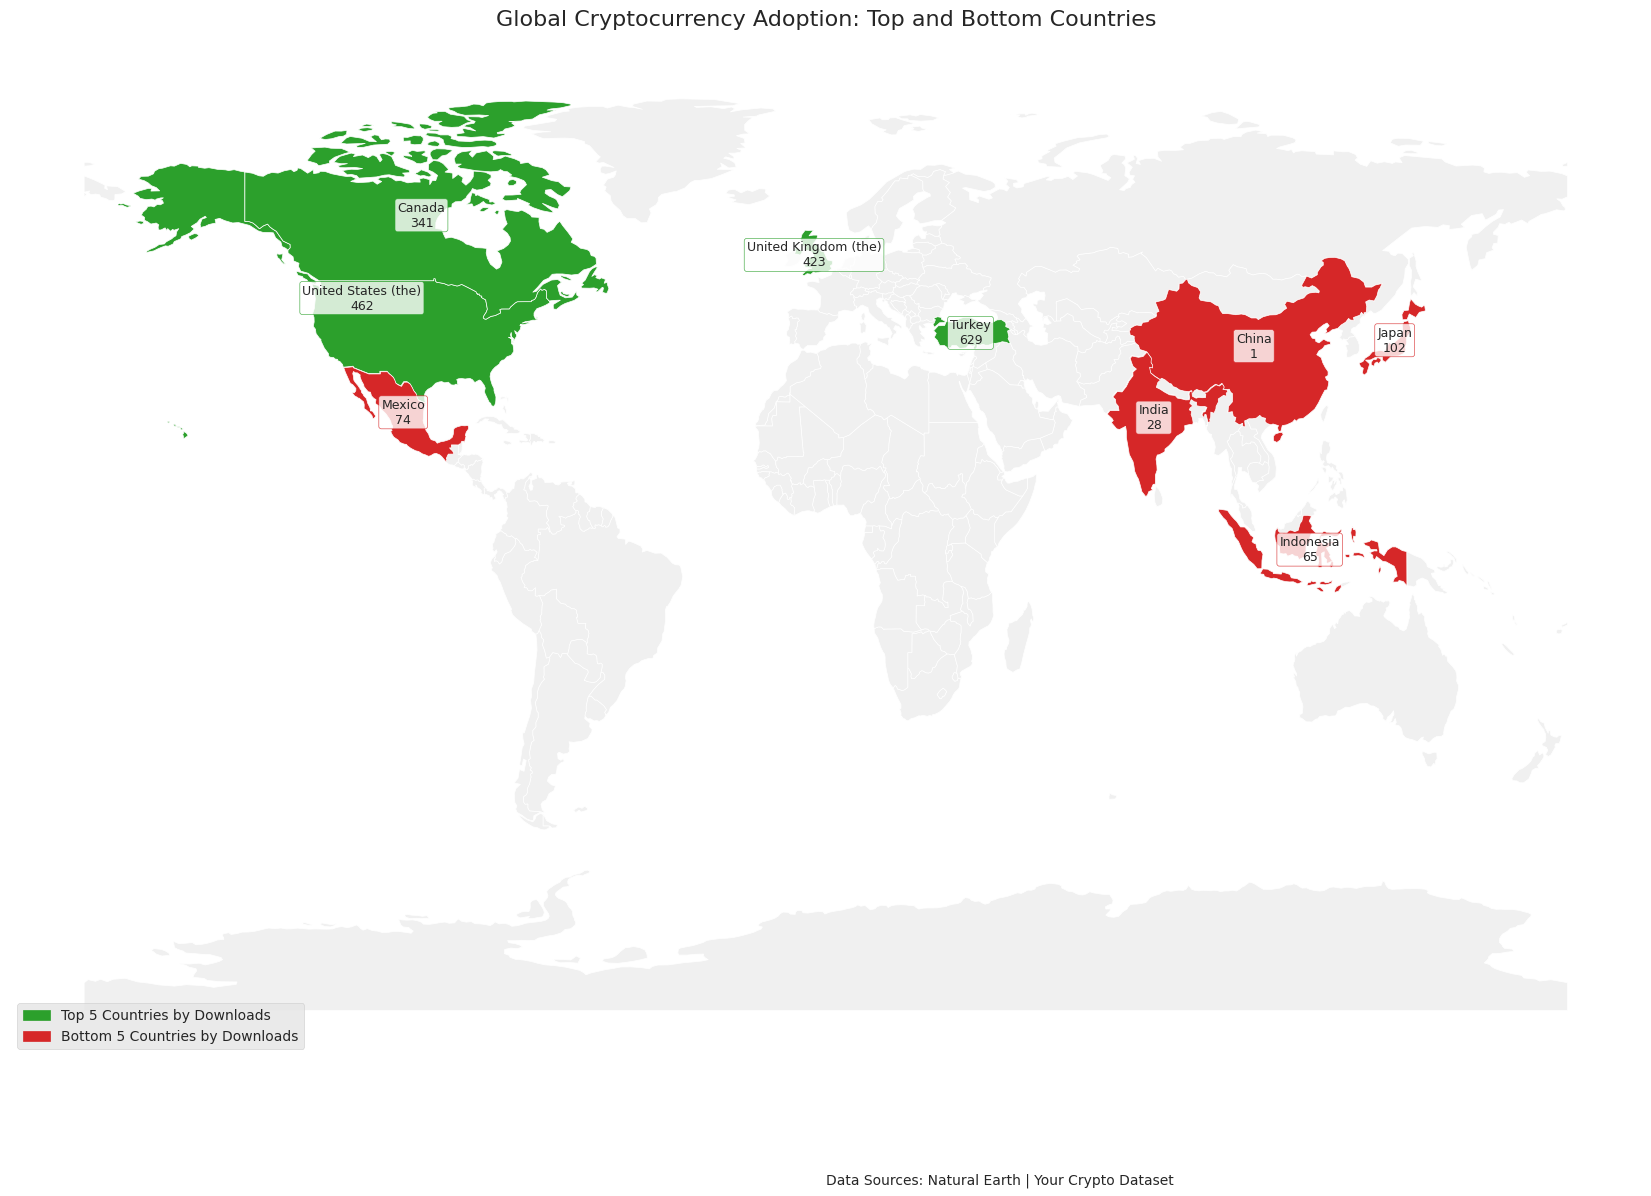

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

# 1. Prepare your data (replace with your actual data)
data = {
    'Top Countries': ['Turkey', 'United States (the)', 'United Kingdom (the)', '[South] Korea', 'Canada'],
    'Top Downloads': [629, 462, 423, 359, 341],
    'Bottom Countries': ['China', 'India', 'Indonesia', 'Mexico', 'Japan'],
    'Bottom Downloads': [1, 28, 65, 74, 102]
}

# 2. Download Natural Earth data directly
world = gpd.read_file('https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip')

# 3. Standardize country names
name_mapping = {
    'United States of America': 'United States (the)',
    'United Kingdom': 'United Kingdom (the)',
    'Korea': '[South] Korea',
    'Czechia': 'Czech Republic'
}
world['NAME'] = world['NAME'].replace(name_mapping)

# 4. Create the visualization
fig, ax = plt.subplots(figsize=(20, 12))

# Plot all countries in light gray first
world.plot(ax=ax, color='#f0f0f0', edgecolor='white', linewidth=0.5)

# Highlight top countries in green
for country, downloads in zip(data['Top Countries'], data['Top Downloads']):
    if country in world['NAME'].values:
        world[world['NAME'] == country].plot(
            ax=ax,
            color='#2ca02c',  # Green
            edgecolor='white',
            linewidth=0.5
        )
        # Add label with download count
        centroid = world[world['NAME'] == country].geometry.centroid
        ax.text(
            x=centroid.x.iloc[0],
            y=centroid.y.iloc[0],
            s=f"{country}\n{downloads}",
            ha='center',
            va='center',
            fontsize=9,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='#2ca02c', boxstyle='round,pad=0.2')
        )

# Highlight bottom countries in red
for country, downloads in zip(data['Bottom Countries'], data['Bottom Downloads']):
    if country in world['NAME'].values:
        world[world['NAME'] == country].plot(
            ax=ax,
            color='#d62728',  # Red
            edgecolor='white',
            linewidth=0.5
        )
        # Add label with download count
        centroid = world[world['NAME'] == country].geometry.centroid
        ax.text(
            x=centroid.x.iloc[0],
            y=centroid.y.iloc[0],
            s=f"{country}\n{downloads}",
            ha='center',
            va='center',
            fontsize=9,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='#d62728', boxstyle='round,pad=0.2')
        )

# Create legend
top_patch = mpatches.Patch(color='#2ca02c', label='Top 5 Countries by Downloads')
bottom_patch = mpatches.Patch(color='#d62728', label='Bottom 5 Countries by Downloads')
plt.legend(handles=[top_patch, bottom_patch], loc='lower left')

# Add title and finishing touches
plt.title('Global Cryptocurrency Adoption: Top and Bottom Countries', fontsize=16, pad=20)
plt.annotate('Data Sources: Natural Earth | Your Crypto Dataset',
            xy=(0.5, 0.01),
            xycoords='figure fraction',
            ha='center',
            fontsize=10)

ax.set_axis_off()
plt.tight_layout()
plt.show()

Graph 1 Sheet Crypto App Downloads and Active Users per Million Across Seven Countries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('CryptoAdaption_for_1000,000inhabitants.csv', header=None, skiprows=4)

# Extract and separate the two main data sections
downloads_data = df.iloc[:, :8]  # First 8 columns contain downloads data
active_users_data = df.iloc[:, 10:18]  # Columns 10-17 contain active users data

# Set proper column names
downloads_columns = ['Date', 'GB_Downloads', 'HK_Downloads', 'KR_Downloads',
                    'NL_Downloads', 'NO_Downloads', 'SG_Downloads', 'US_Downloads']
active_users_columns = ['Date', 'GB_ActiveUsers', 'HK_ActiveUsers', 'KR_ActiveUsers',
                       'NL_ActiveUsers', 'NO_ActiveUsers', 'SG_ActiveUsers', 'US_ActiveUsers']

downloads_data.columns = downloads_columns
active_users_data.columns = active_users_columns

# Merge both datasets
final_df = pd.merge(downloads_data, active_users_data, on='Date')

# Convert Date to datetime and set as index
final_df['Date'] = pd.to_datetime(final_df['Date'])
final_df.set_index('Date', inplace=True)

# Convert all columns to numeric (handling any non-numeric values)
final_df = final_df.apply(pd.to_numeric, errors='coerce')

# Display cleaned data
print("Cleaned Data Shape:", final_df.shape)
final_df.head()

Cleaned Data Shape: (88, 14)


,GB_Downloads,HK_Downloads,KR_Downloads,NL_Downloads,NO_Downloads,SG_Downloads,US_Downloads,GB_ActiveUsers,HK_ActiveUsers,KR_ActiveUsers,NL_ActiveUsers,NO_ActiveUsers,SG_ActiveUsers,US_ActiveUsers
Date,,,,,,,,,,,,,,
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Remove rows with NaT in index (invalid dates)
final_df = final_df[final_df.index.notna()]

# Forward fill any remaining NaN values (or use other appropriate method)
final_df = final_df.ffill()

# Verify cleaning
print("Cleaned Data Shape:", final_df.shape)
final_df.head()

Cleaned Data Shape: (82, 14)


,GB_Downloads,HK_Downloads,KR_Downloads,NL_Downloads,NO_Downloads,SG_Downloads,US_Downloads,GB_ActiveUsers,HK_ActiveUsers,KR_ActiveUsers,NL_ActiveUsers,NO_ActiveUsers,SG_ActiveUsers,US_ActiveUsers
Date,,,,,,,,,,,,,,
2015-08-01,179.8,108.2,19.7,125.5,291.6,334.6,122.9,178.8,29.5,5.8,141.4,242.1,278.6,115.6
2015-09-01,145.3,88.1,11.2,104.6,245.9,281.3,109.7,179.1,28.6,5.0,145.4,255.8,263.8,127.9
2015-10-01,151.2,101.9,5.7,146.6,557.6,315.6,125.2,187.6,32.7,4.3,154.2,296.4,280.1,139.9
2015-11-01,158.7,128.1,10.3,359.3,418.4,360.4,130.7,196.4,37.0,4.5,196.7,301.7,282.9,153.9
2015-12-01,163.4,135.8,56.0,202.2,361.6,382.7,145.6,204.5,39.6,9.0,202.4,314.8,298.6,171.2


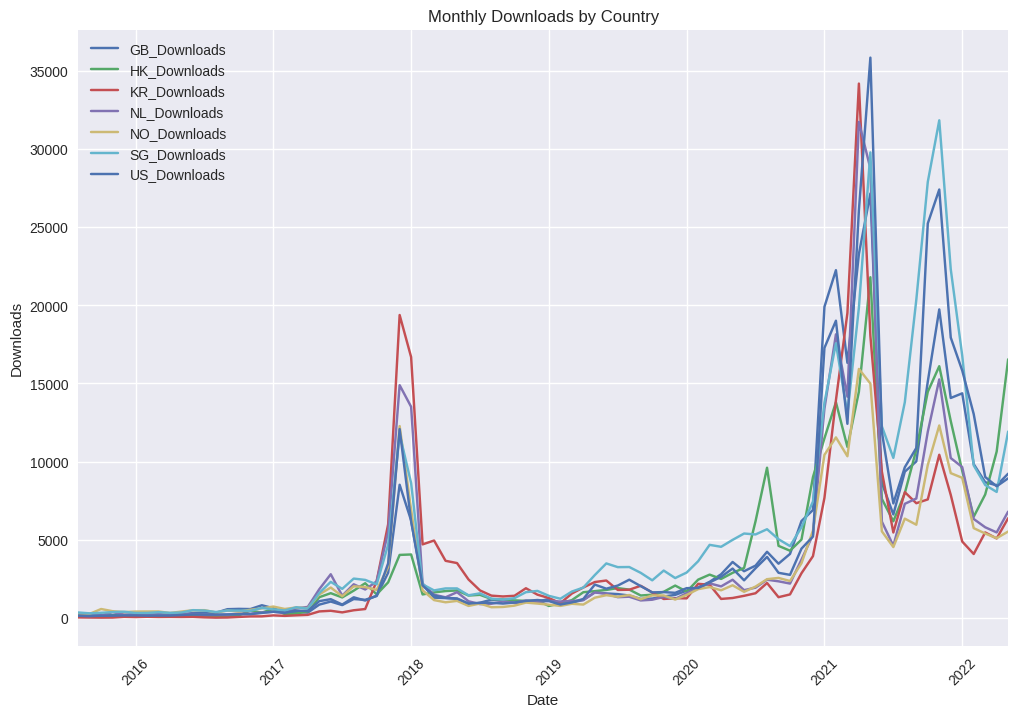

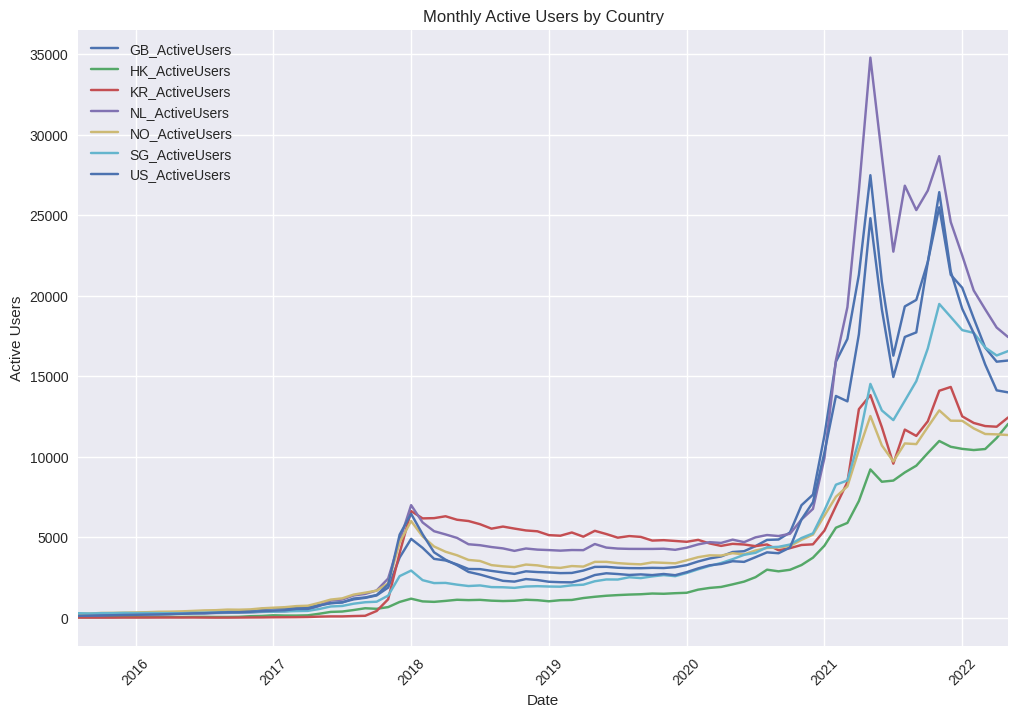

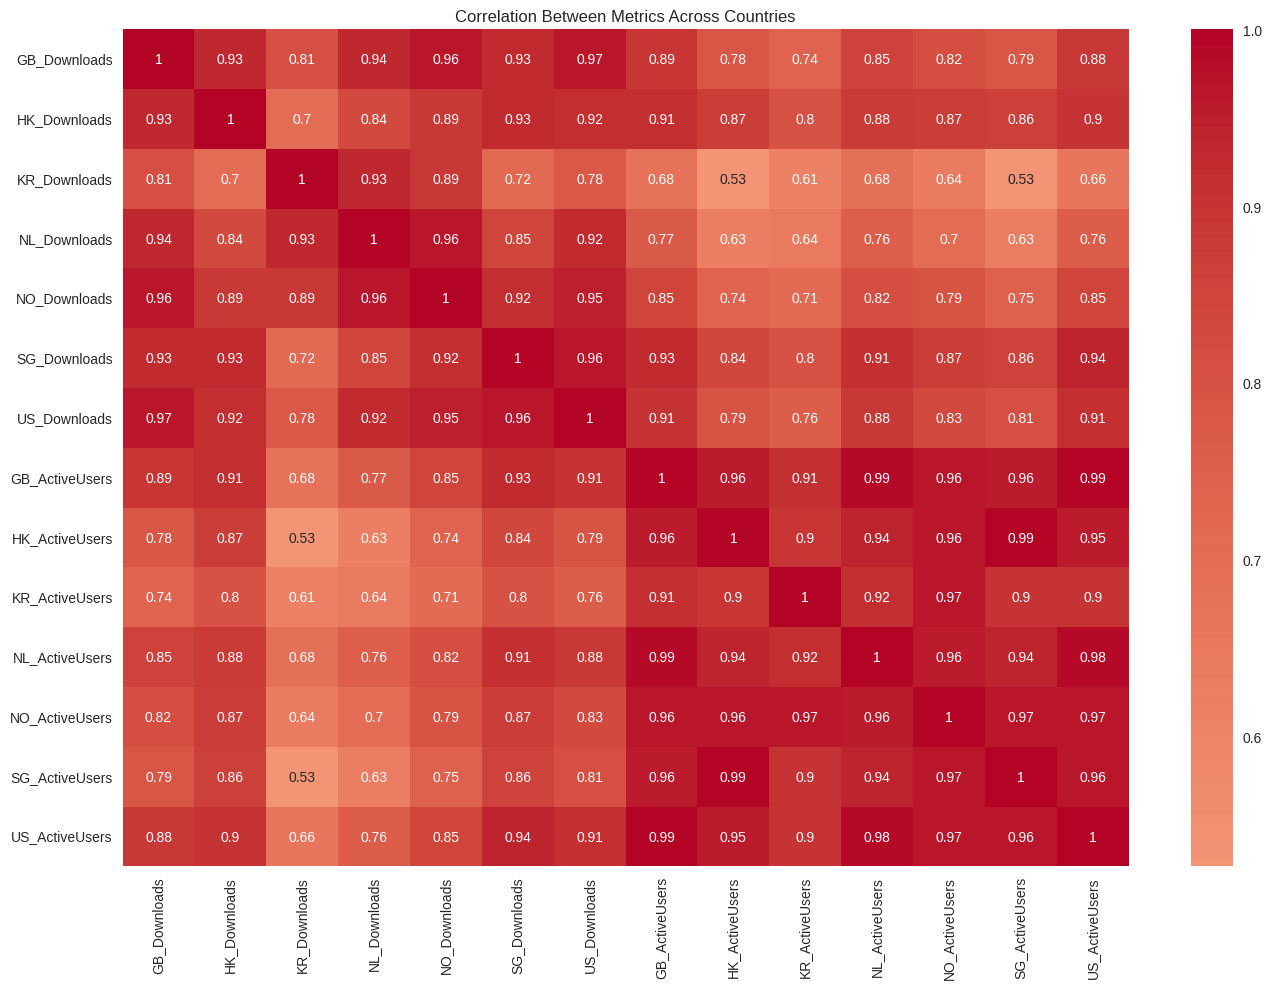

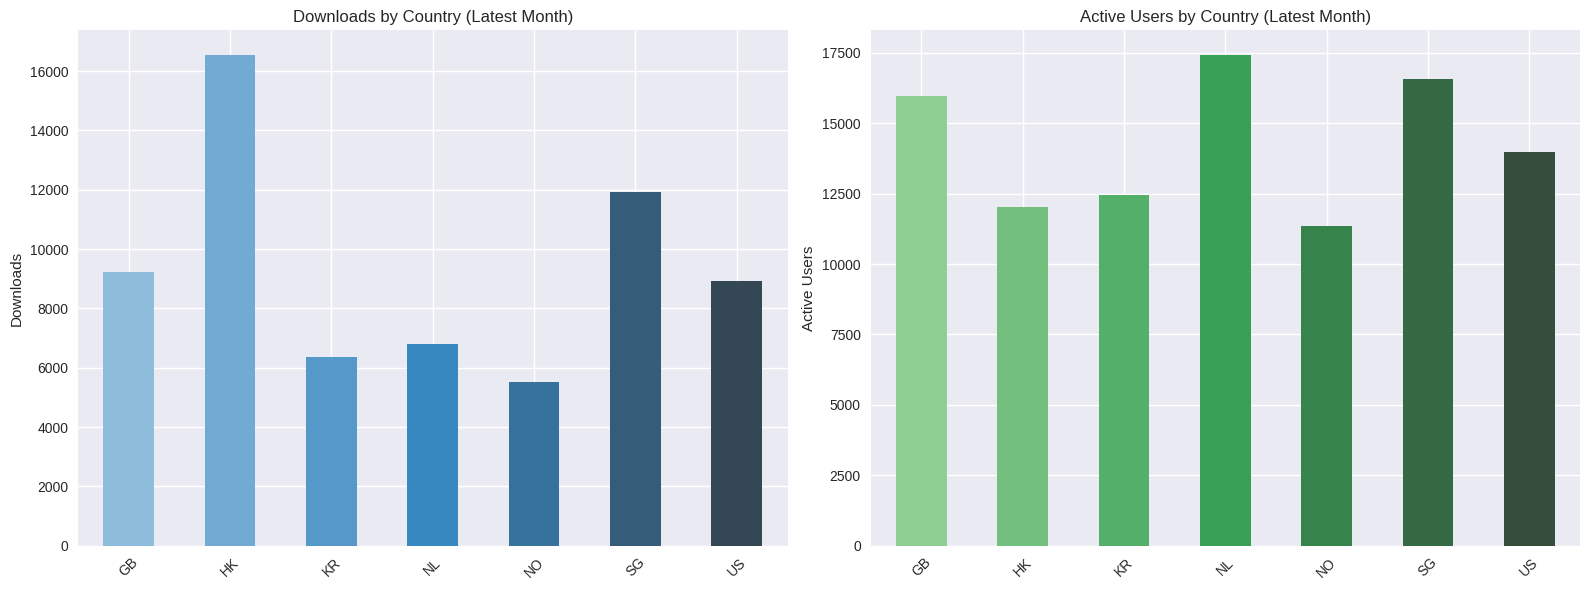

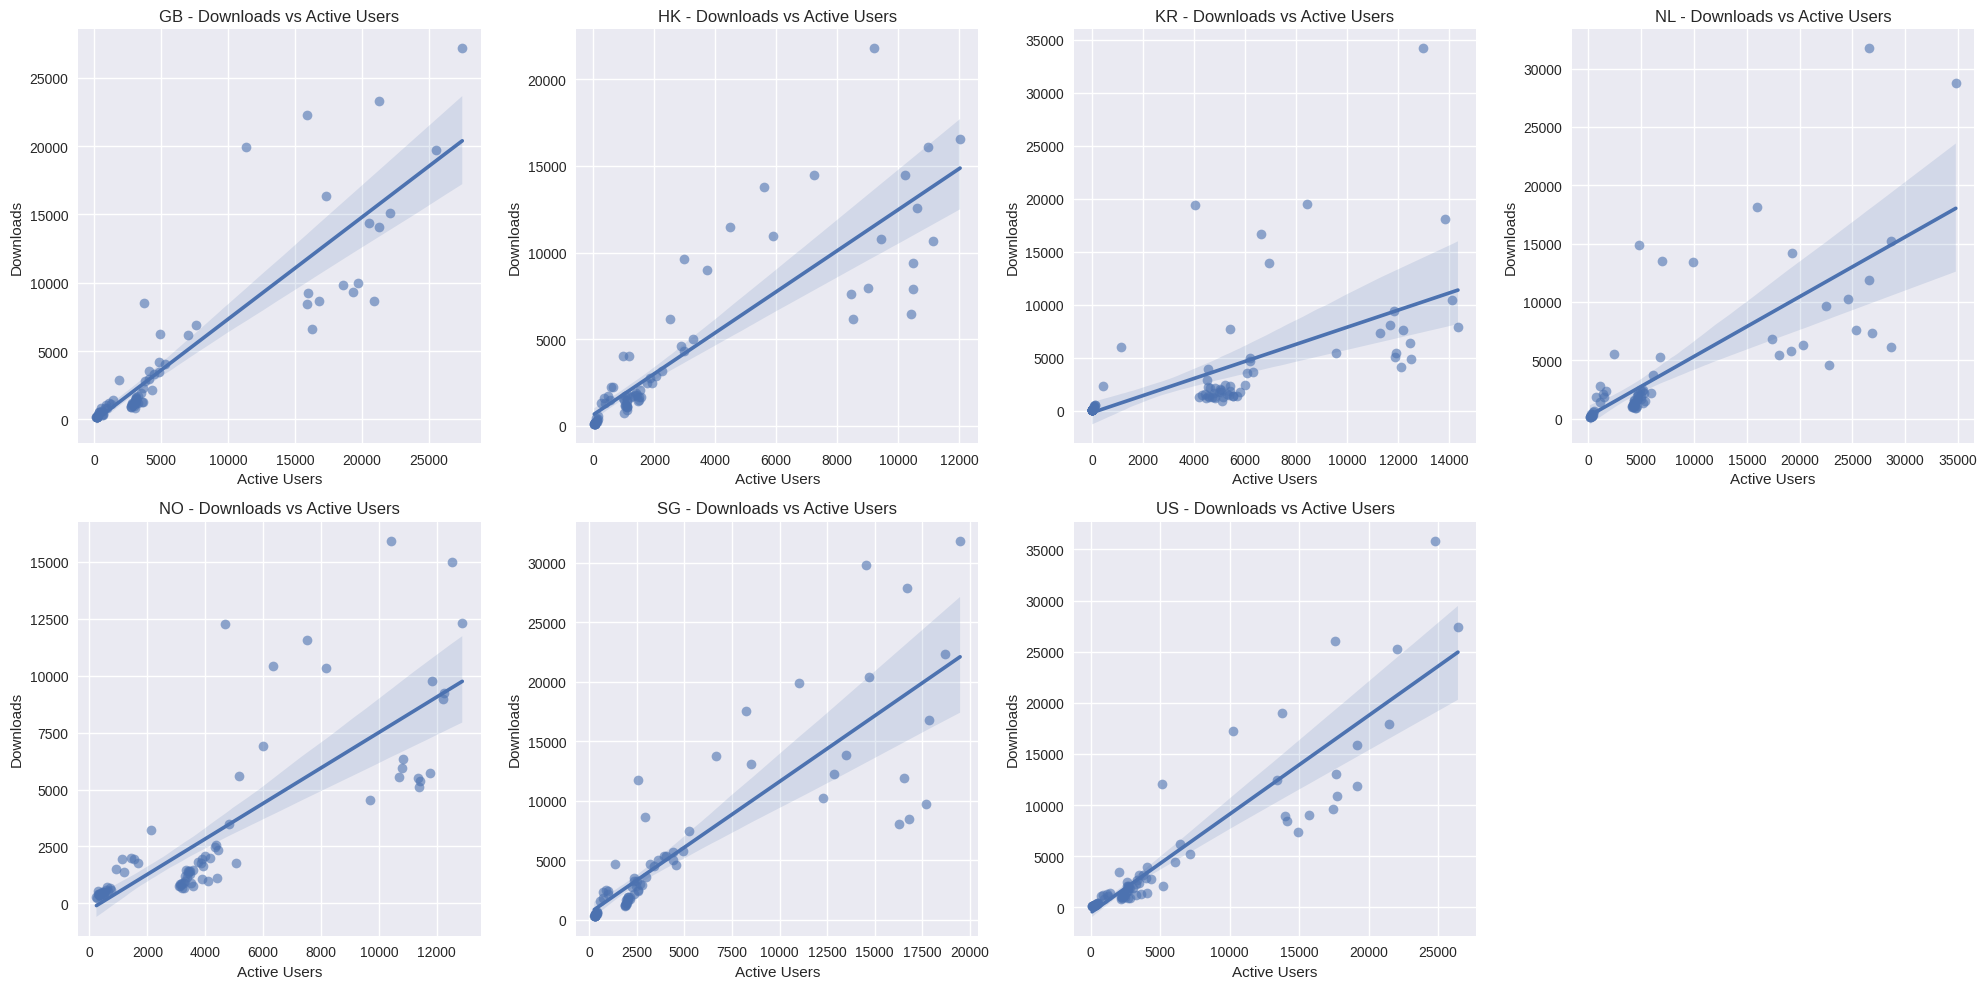


Downloads Summary Statistics:
       GB_Downloads  HK_Downloads  KR_Downloads  NL_Downloads  NO_Downloads  \
count     82.000000     82.000000     82.000000     82.000000     82.000000   
mean    4218.856098   3787.735366   3591.745122   3821.217073   2976.025610   
std     6073.354347   4785.926503   5608.111762   5905.170471   3694.288894   
min      145.300000     75.200000      5.300000    104.600000    245.900000   
25%      800.650000    609.000000    222.925000    736.100000    675.175000   
50%     1270.500000   1666.050000   1558.200000   1499.900000   1427.450000   
75%     5699.200000   4903.450000   4542.275000   4388.150000   3424.900000   
max    27164.100000  21801.300000  34200.700000  31748.300000  15931.200000   

       SG_Downloads  US_Downloads  
count     82.000000     82.000000  
mean    5386.869512   4612.921951  
std     7085.918804   7186.964354  
min      281.300000    109.700000  
25%      794.300000    553.675000  
50%     2408.050000   1504.800000  
75%  

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualization style - UPDATED VERSION
plt.style.use('seaborn-v0_8')  # Use the updated seaborn style
plt.rcParams['figure.figsize'] = [12, 8]

# 1. Time Series Analysis - Downloads
download_cols = [col for col in final_df.columns if 'Downloads' in col]
final_df[download_cols].plot(title='Monthly Downloads by Country', ylabel='Downloads')
plt.xticks(rotation=45)
plt.show()

# 2. Time Series Analysis - Active Users
user_cols = [col for col in final_df.columns if 'ActiveUsers' in col]
final_df[user_cols].plot(title='Monthly Active Users by Country', ylabel='Active Users')
plt.xticks(rotation=45)
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(final_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Metrics Across Countries')
plt.tight_layout()
plt.show()

# 4. Country-wise Comparison (Latest Month)
latest_data = final_df.iloc[-1]

# Create subplots with proper style
with plt.style.context('seaborn-v0_8'):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Downloads plot
    latest_data[download_cols].plot(
        kind='bar',
        ax=ax1,
        color=sns.color_palette("Blues_d", len(download_cols))
    )
    ax1.set_title('Downloads by Country (Latest Month)')
    ax1.set_ylabel('Downloads')
    ax1.set_xticklabels([col.split('_')[0] for col in download_cols], rotation=45)

    # Active Users plot
    latest_data[user_cols].plot(
        kind='bar',
        ax=ax2,
        color=sns.color_palette("Greens_d", len(user_cols))
    )
    ax2.set_title('Active Users by Country (Latest Month)')
    ax2.set_ylabel('Active Users')
    ax2.set_xticklabels([col.split('_')[0] for col in user_cols], rotation=45)

    plt.tight_layout()
    plt.show()

# 5. Downloads vs Active Users Scatter Plots
with plt.style.context('seaborn-v0_8'):
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.ravel()

    for i, country in enumerate(['GB', 'HK', 'KR', 'NL', 'NO', 'SG', 'US']):
        sns.regplot(
            data=final_df,
            x=f'{country}_ActiveUsers',
            y=f'{country}_Downloads',
            ax=axes[i],
            scatter_kws={'alpha':0.6}
        )
        axes[i].set_title(f'{country} - Downloads vs Active Users')
        axes[i].set_xlabel('Active Users')
        axes[i].set_ylabel('Downloads')

    axes[-1].axis('off')
    plt.tight_layout()
    plt.show()

# 6. Summary Statistics (unchanged)
print("\nDownloads Summary Statistics:")
print(final_df[download_cols].describe())

print("\nActive Users Summary Statistics:")
print(final_df[user_cols].describe())

# 7. Growth Rates Calculation (unchanged)
growth_rates = final_df.pct_change(periods=12)
print("\nYear-over-Year Growth Rates (Latest Month):")
print(growth_rates.iloc[-1][download_cols + user_cols].sort_values(ascending=False))

In [ ]:
# Calculate downloads per active user
engagement = pd.DataFrame()
for country in ['GB','HK','KR','NL','NO','SG','US']:
    engagement[f'{country}_Engagement'] = final_df[f'{country}_Downloads']/final_df[f'{country}_ActiveUsers']

print("Average Downloads per Active User:")
print(engagement.mean().sort_values(ascending=False))

Average Downloads per Active User:
HK_Engagement    2.048593
KR_Engagement    1.902713
SG_Engagement    1.369748
NO_Engagement    0.779739
US_Engagement    0.779491
GB_Engagement    0.757953
NL_Engagement    0.718442
dtype: float64


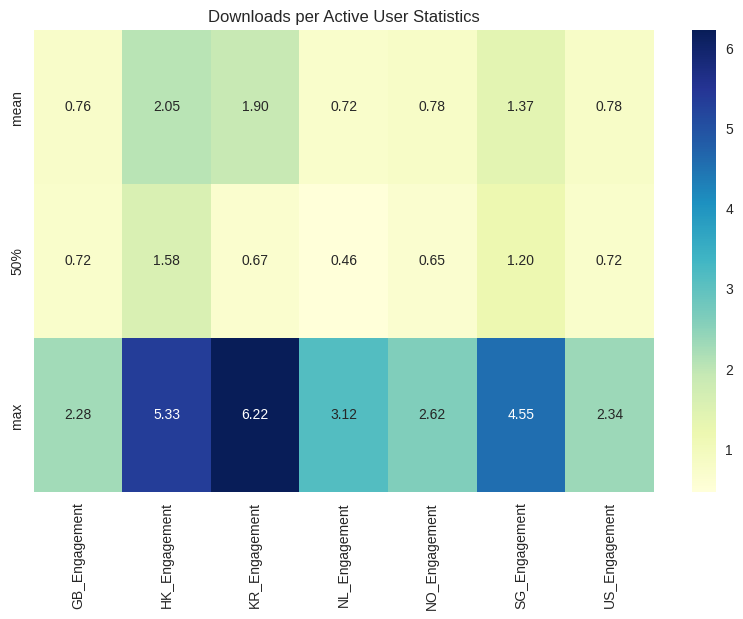

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(engagement.describe().loc[['mean','50%','max']],
            annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Downloads per Active User Statistics')
plt.show()

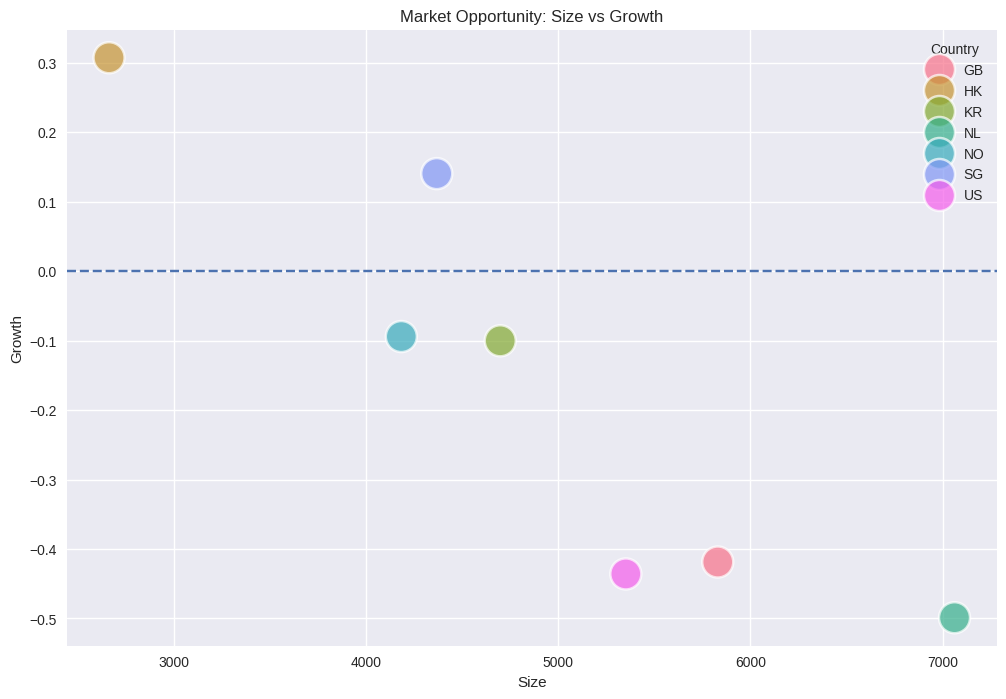

In [ ]:
# Create growth vs size matrix
opportunity = pd.DataFrame({
    'Size': final_df[user_cols].mean(),
    'Growth': growth_rates[user_cols].iloc[-1]
})
opportunity['Country'] = [x.split('_')[0] for x in opportunity.index]

sns.scatterplot(data=opportunity, x='Size', y='Growth', hue='Country',
               s=500, alpha=0.7)
plt.axhline(0, linestyle='--')
plt.title('Market Opportunity: Size vs Growth')
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd

# Extract and prepare the data (same as before)
country_data = []
for col in final_df.columns:
    if '_' in col:
        country, metric = col.split('_')
        value = final_df[col].iloc[-1]
        country_data.append({'Country': country, 'Metric': metric, 'Value': value})

metrics_df = pd.DataFrame(country_data)
wide_df = metrics_df.pivot(index='Country', columns='Metric', values='Value').reset_index()

# Enhanced country mapping with ISO-3 codes for better map recognition
country_mapping = {
    'GB': {'name': 'United Kingdom', 'iso3': 'GBR'},
    'HK': {'name': 'Hong Kong SAR China', 'iso3': 'HKG'},
    'KR': {'name': 'South Korea', 'iso3': 'KOR'},
    'NL': {'name': 'Netherlands', 'iso3': 'NLD'},
    'NO': {'name': 'Norway', 'iso3': 'NOR'},
    'SG': {'name': 'Singapore', 'iso3': 'SGP'},
    'US': {'name': 'United States', 'iso3': 'USA'}
}

# Apply mapping and add ISO-3 codes
wide_df['Country_Name'] = wide_df['Country'].map(lambda x: country_mapping[x]['name'])
wide_df['ISO3'] = wide_df['Country'].map(lambda x: country_mapping[x]['iso3'])

# Create enhanced choropleth map with bubbles overlay
fig = px.choropleth(wide_df,
                    locations="ISO3",
                    color="Downloads",
                    hover_name="Country_Name",
                    hover_data=["ActiveUsers", "Downloads"],
                    projection="natural earth",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Global Performance Metrics by Country")

# Add bubble layer for Active Users
fig.add_trace(px.scatter_geo(wide_df,
                            locations="ISO3",
                            size="ActiveUsers",
                            hover_name="Country_Name",
                            projection="natural earth").data[0])

# Customize the layout
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        landcolor='lightgray',
        countrycolor='white',
        projection_scale=2,  # Zoom level
        center={"lat": 30, "lon": 0}  # Map center
    ),
    coloraxis_colorbar=dict(
        title="Downloads",
        thickness=20,
        len=0.5
    ),
    margin={"r":0,"t":40,"l":0,"b":0},
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Arial"
    )
)

# Add annotations for each country
for i, row in wide_df.iterrows():
    fig.add_annotation(
        x=row['ISO3'],
        y=row['Country_Name'],
        text=f"{row['Country']}<br>Active: {row['ActiveUsers']:,.0f}",
        showarrow=False,
        font=dict(size=10, color="black"),
        xshift=10
    )

fig.show()

In [ ]:
import geopandas as gpd
import plotly.express as px
import pandas as pd

# Mapping of country codes to full country names
country_mapping = {
    'GB': 'United Kingdom',
    'HK': 'Hong Kong',
    'KR': 'South Korea',
    'NL': 'Netherlands',
    'NO': 'Norway',
    'SG': 'Singapore',
    'US': 'United States'
}

# Extract country metrics in a more efficient way
country_data = [
    {'Country': col.split('_')[0], 'Metric': col.split('_')[1], 'Value': final_df[col].iloc[-1]}
    for col in final_df.columns if '_' in col
]

# Convert list to DataFrame
metrics_df = pd.DataFrame(country_data)

# Pivot to wide format for better readability
wide_df = metrics_df.pivot(index='Country', columns='Metric', values='Value').reset_index()

# Map country codes to full names, using .get to ensure no missing values
wide_df['Country'] = wide_df['Country'].apply(lambda x: country_mapping.get(x, x))

# If there are any missing values, you can fill them as needed (e.g., with NaN or 0)
wide_df.fillna(0, inplace=True)  # Optionally replace NaN with 0

# You can now proceed to further analysis or visualization with `wide_df`
# Example visualization using Plotly
fig = px.bar(wide_df, x='Country', y=wide_df.columns[1:], title="Metrics by Country")
fig.show()



Graph 2 Sheet Displays total cryptocurrency app downloads in 33 countries (absolute and per million people).


In [ ]:
import pandas as pd

# Read the file (skip metadata rows)
df = pd.read_excel("work1049_data_xls.xlsx",
                   sheet_name="Graph2",
                   header=None,
                   skiprows=5)  # Skip title and header rows

# Manually assign proper headers (since original headers are in row 4)
headers = ["Country_Code", "Total_Downloads", "Downloads_per_1M"]
df.columns = headers

# Remove any remaining NaN rows
df = df.dropna()
print(df.head())

  Country_Code Total_Downloads Downloads_per_1M
1           TR        44297332         520883.2
2           SG         2474427         453726.4
3           US       126993169           382632
4           GB        23591459         350403.4
5           CY          395761         325571.7


In [ ]:
print(df.head())  # Should show Country_Code and Downloads_per_1M
print(df["Country_Code"].unique())  # Check if codes are valid ISO-2 (e.g., "US", "GB")

  Country_Code  Downloads_per_1M         Country
0           TR          520883.2          Turkey
1           SG          453726.4       Singapore
2           US          382632.0   United States
3           GB          350403.4  United Kingdom
4           CY          325571.7          Cyprus
['TR' 'SG' 'US' 'GB' 'CY' 'HR' 'HK' 'NL' 'LT' 'MT' 'KR' 'AE' 'IE' 'CA'
 'AU' 'NZ' 'SI' 'BG' 'UY' 'NO' 'FR' 'IT' 'AR' 'DE' 'ZA' 'RU' 'SA' 'BR'
 'JP' 'MX' 'ID' 'IN' 'CN']


In [ ]:
!pip install pycountry

In [ ]:
import pandas as pd
import plotly.express as px
import pycountry
import plotly.graph_objects as go

# ======================
# 📥 Prepare Data
# ======================
data = {
    "Country_Code": ["TR", "SG", "US", "GB", "CY", "HR", "HK", "NL", "LT", "MT",
                     "KR", "AE", "IE", "CA", "AU", "NZ", "SI", "BG", "UY", "NO",
                     "FR", "IT", "AR", "DE", "ZA", "RU", "SA", "BR", "JP", "MX",
                     "ID", "IN", "CN"],
    "Total_Downloads": [44297332, 2474427, 126993169, 23591459, 395761, 1257558, 2373551,
                        5538183, 877257, 158423, 15389535, 2930516, 1453655, 10757234,
                        7230038, 1399175, 542127, 1742170, 861677, 1329941, 10877388,
                        9166122, 6692278, 10967617, 7247379, 15206977, 3722891, 21390054,
                        10663630, 7954102, 14839958, 31716298, 1373768],
    "Downloads_per_1M": [520883.2, 453726.4, 382632, 350403.4, 325571.7, 322533.5,
                         320183.3, 315864.7, 313830.5, 306505.1, 297411.8, 293313.2,
                         289098.8, 281263.5, 280895.4, 273137.7, 257297.2, 252520.4,
                         247242.3, 245906.5, 161148.1, 155183.8, 146091.7, 131934.5,
                         120705.2, 106011.8, 105342.9, 99956.6, 84846.4, 61062.2,
                         53697.6, 22761.7, 972.7]
}
df = pd.DataFrame(data)

# Convert ISO2 to ISO3
df["ISO3"] = df["Country_Code"].apply(lambda x: pycountry.countries.get(alpha_2=x).alpha_3)

# ======================
# 🎨 Plot Base Map
# ======================
def create_choropleth(selected_country=None, metric="Downloads_per_1M"):
    filtered_df = df.copy()

    if selected_country and selected_country != "All":
        filtered_df = filtered_df[filtered_df["Country_Code"] == selected_country]

    fig = px.choropleth(
        filtered_df,
        locations="ISO3",
        color=metric,
        hover_name="Country_Code",
        hover_data={
            "Downloads_per_1M": ":,.0f",
            "Total_Downloads": ":,",
            "ISO3": False
        },
        color_continuous_scale="Viridis" if metric == "Downloads_per_1M" else "Plasma",
        title=f"Crypto App Adoption - {metric.replace('_', ' ')}",
        projection="natural earth"
    )

    fig.update_layout(
        geo=dict(
            showframe=False,
            showcoastlines=True,
            landcolor="whitesmoke"
        ),
        margin=dict(l=0, r=0, t=60, b=0),
        coloraxis_colorbar=dict(
            title=metric.replace("_", " "),
            thickness=20,
            len=0.75,
        ),
    )

    return fig

# ======================
# 🔘 Create Dropdown Slicer
# ======================
country_options = ["All"] + sorted(df["Country_Code"].unique())
buttons = []

for country in country_options:
    visible_df = df.copy()
    if country != "All":
        visible_df = df[df["Country_Code"] == country]
    fig = create_choropleth(selected_country=country)
    buttons.append(dict(
        method="restyle",
        label=country,
        args=[{"locations": [visible_df["ISO3"]],
               "z": [visible_df["Downloads_per_1M"]],
               "hovertext": [visible_df["Country_Code"]]}]
    ))

# Default figure
fig = create_choropleth()

fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction="down",
            showactive=True,
            x=0.0,
            xanchor="left",
            y=1.15,
            yanchor="top"
        )
    ]
)

fig.show()


Men vs Female

In [ ]:
import pandas as pd

# Read the file (adjust sheet_name if needed)
df = pd.read_excel("work1049_data_xls.xlsx", sheet_name="Graph3", header=None)  # No header for messy data
print(df.head(10))  # Inspect the raw data

                               0  \
0  As sources, please reference:   
1                            NaN   
2                            NaN   
3                            NaN   
4                          Title   
5                            NaN   
6                            NaN   
7                            NaN   

                                                   1      2             3   4  \
0                                                NaN    NaN           NaN NaN   
1                                       Sensor Tower    NaN           NaN NaN   
2  R Auer, G Cornelli, S Doerr, J Frost and L Gam...    NaN           NaN NaN   
3                                                NaN    NaN           NaN NaN   
4  All the young dudes? More than half of crypto ...    NaN           NaN NaN   
5                                              Women    NaN           NaN NaN   
6                                       Less than 35  35-54  More than 54 NaN   
7                          

In [ ]:
# Manually extract the table (adjust row/column indices as needed)
data = {
    "Gender": ["Women", "Women", "Women", "Men", "Men", "Men"],
    "Age Group": ["<35", "35-54", ">54", "<35", "35-54", ">54"],
    "Percentage": [19.2, 11.6, 1.5, 40.5, 24.1, 3.2]
}

df_clean = pd.DataFrame(data)
print(df_clean)

  Gender Age Group  Percentage
0  Women       <35        19.2
1  Women     35-54        11.6
2  Women       >54         1.5
3    Men       <35        40.5
4    Men     35-54        24.1
5    Men       >54         3.2


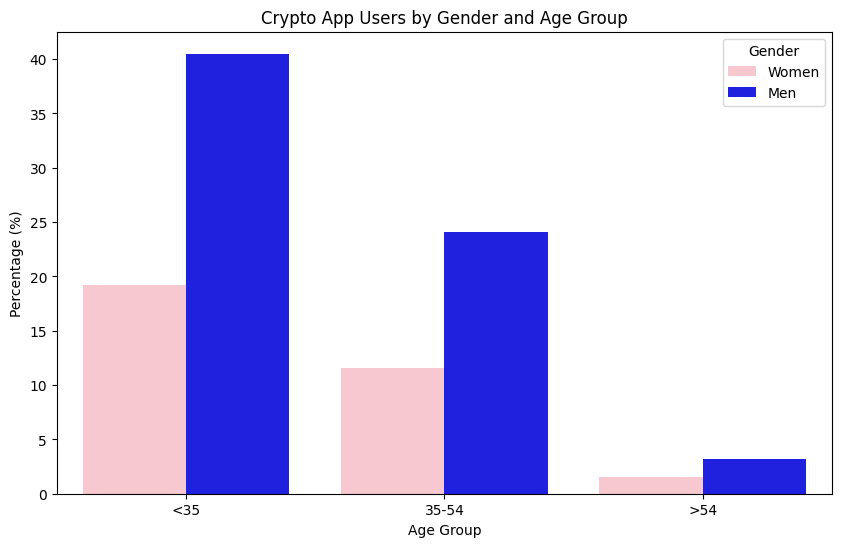

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=df_clean, x="Age Group", y="Percentage", hue="Gender", palette=["pink", "blue"])
plt.title("Crypto App Users by Gender and Age Group")
plt.ylabel("Percentage (%)")
plt.show()

Graph 4 Sheet Retail Investor Behaviour:

In [ ]:
import pandas as pd

# Read the Excel file
raw_df = pd.read_excel("work1049_data_xls.xlsx", sheet_name="Graph4", header=None)

# Find the starting row of actual data (where "0-5000" appears)
start_row = None
for i in range(len(raw_df)):
    if raw_df.iloc[i,1] == "0-5000":
        start_row = i
        break

if start_row is not None:
    # Extract exactly 9 rows of data (from your sample)
    df = raw_df.iloc[start_row:start_row+9, 1:3].copy()
    df.columns = ["Bitcoin_Price_Range", "Percentage_of_Users"]

    # Convert percentages to numeric
    df["Percentage_of_Users"] = pd.to_numeric(df["Percentage_of_Users"])

    # Reset index
    df = df.reset_index(drop=True)

    print("Perfectly Cleaned Data:")
    print(df)



Perfectly Cleaned Data:
  Bitcoin_Price_Range  Percentage_of_Users
0              0-5000                  4.7
1          5000-10000                 11.9
2         10000-15000                  7.0
3         15000-20000                  3.7
4         20000-25000                  2.0
5         25000-30000                  2.4
6         30000-35000                  6.2
7         35000-40000                 11.5
8         40000-45000                 10.6


In [ ]:
# Calculate basic statistics
stats = df["Percentage_of_Users"].describe()
print("\nUsage Statistics:")
print(f"Most popular range: {df.loc[df['Percentage_of_Users'].idxmax(), 'Bitcoin_Price_Range']}")
print(f"Average percentage: {stats['mean']:.2f}%")
print(f"Median percentage: {stats['50%']:.2f}%")


Usage Statistics:
Most popular range: 5000-10000
Average percentage: 6.67%
Median percentage: 6.20%


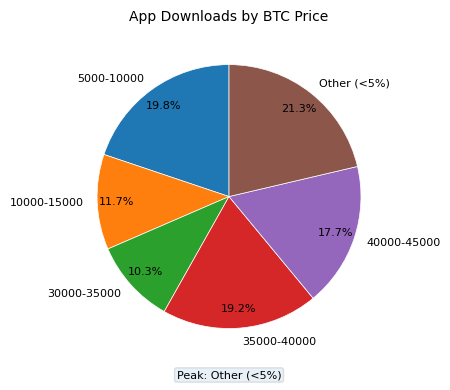

In [ ]:
plt.figure(figsize=(6, 4))  # Ultra-compact size

# Prepare data - group small slices (threshold at 5%)
threshold = 5
main_data = df[df['Percentage_of_Users'] >= threshold]
other_sum = df[df['Percentage_of_Users'] < threshold]['Percentage_of_Users'].sum()

if other_sum > 0:
    other_row = pd.DataFrame({'Bitcoin_Price_Range': ['Other (<5%)'], 'Percentage_of_Users': [other_sum]})
    plot_data = pd.concat([main_data, other_row])
else:
    plot_data = main_data.copy()

# Create optimized pie chart
plt.pie(
    plot_data['Percentage_of_Users'],
    labels=plot_data['Bitcoin_Price_Range'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("tab10"),  # High-contrast colors
    wedgeprops={'linewidth': 0.5, 'edgecolor': 'white'},
    textprops={'fontsize': 8},
    pctdistance=0.85  # Pull percentages inward
)

# Minimalist styling
plt.title('App Downloads by BTC Price', fontsize=10, pad=8)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)  # Maximize pie area

# Add key insight annotation
max_range = plot_data.loc[plot_data['Percentage_of_Users'].idxmax(), 'Bitcoin_Price_Range']
plt.annotate(f"Peak: {max_range}",
             xy=(0.5, -0.05),
             xycoords='axes fraction',
             ha='center',
             fontsize=8,
             bbox=dict(boxstyle="round", pad=0.2, alpha=0.1))

plt.tight_layout()
plt.show()


Graph 5 Distribution of User Gains and Losses in Bitcoin Trading


In [ ]:
import pandas as pd

# Read the Excel file
raw_df = pd.read_excel("work1049_data_xls.xlsx", sheet_name="Graph5", header=None)

# Find the starting row of actual data (where the first range "−1000 – −750" appears)
start_row = None
for i in range(len(raw_df)):
    if raw_df.iloc[i, 1] == "-1000 – -750":
        start_row = i
        break

if start_row is not None:
    # Extract exactly 12 rows of data (based on your sample data)
    df = raw_df.iloc[start_row:start_row+12, 1:3].copy()
    df.columns = ["Gain_or_Loss_Per_User_USD", "Percentage_of_Users"]

    # Convert "Percentage_of_Users" to numeric, handling errors as NaN
    df["Percentage_of_Users"] = pd.to_numeric(df["Percentage_of_Users"], errors='coerce')

    # Reset index for cleaner display
    df = df.reset_index(drop=True)

    # Clean the data further by removing rows where Gain_or_Loss_Per_User_USD or Percentage_of_Users are NaN
    df = df.dropna(subset=["Gain_or_Loss_Per_User_USD", "Percentage_of_Users"])

    print("Perfectly Cleaned Data:")
    print(df)
else:
    print("No starting row found with '-1000 – -750'. Please check the dataset.")


Perfectly Cleaned Data:
   Gain_or_Loss_Per_User_USD  Percentage_of_Users
0               -1000 – -750               21.500
1                -750 – -500               21.300
2                -500 – -250               22.800
3                   -250 – 0               15.400
4                    0 - 250                2.300
5                  250 – 500                0.600
6                  500 – 750                0.800
7                750 – 1,000                1.100
8             1,000 – 10,000               12.100
9           10,000 – 100,000                1.300
10       100,000 – 1,000,000                0.600
11     1,000,000 – 3,500,000                0.011


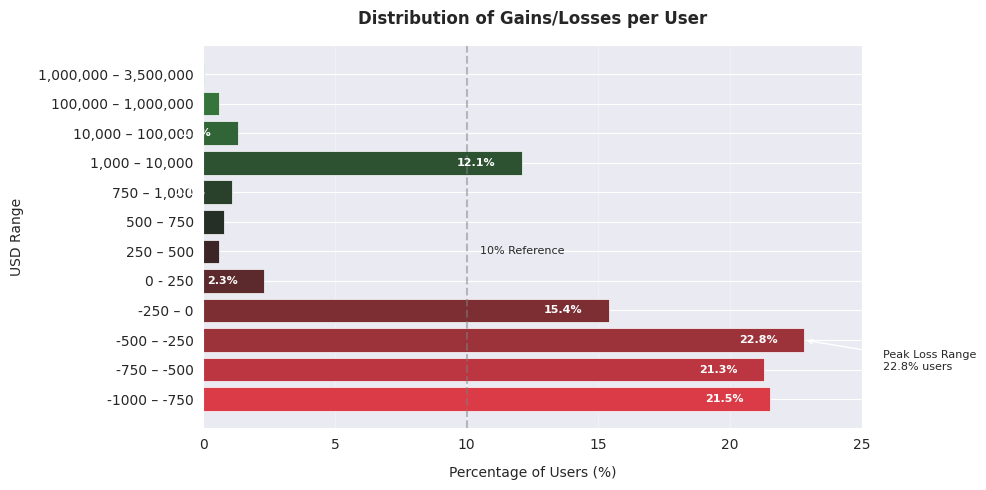

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Use Seaborn's set_style to apply the style:
sns.set_style('darkgrid')  # Or other Seaborn styles like 'whitegrid', 'ticks', etc.

plt.figure(figsize=(10, 5))

# ... (Rest of your plotting code remains the same) ...

# Create custom color gradient (red to green)
colors = sns.diverging_palette(10, 130, n=len(df), center='dark')

# Horizontal bar plot
bars = plt.barh(
    y=df['Gain_or_Loss_Per_User_USD'],
    width=df['Percentage_of_Users'],
    color=colors,
    edgecolor='white',
    linewidth=0.5
)

# Add value labels
for bar in bars:
    width = bar.get_width()
    if width > 1:  # Only label significant bars
        plt.text(
            width - 1,
            bar.get_y() + bar.get_height()/2,
            f'{width:.1f}%',
            va='center',
            ha='right',
            color='white',
            fontsize=8,
            fontweight='bold'
        )

# Formatting
plt.title('Distribution of Gains/Losses per User', pad=15, fontweight='bold')
plt.xlabel('Percentage of Users (%)', labelpad=10)
plt.ylabel('USD Range', labelpad=10)
plt.xlim(0, 25)
plt.grid(axis='x', alpha=0.3)

# Add reference lines and annotations
plt.axvline(x=10, color='gray', linestyle='--', alpha=0.5)
plt.text(10.5, 5, '10% Reference', rotation=0, va='center', fontsize=8)

# Highlight key insights
max_loss = df.iloc[2]['Percentage_of_Users']
plt.annotate(f'Peak Loss Range\n{max_loss:.1f}% users',
             xy=(max_loss, 2),
             xytext=(max_loss+3, 1),
             arrowprops=dict(arrowstyle='->'),
             fontsize=8)

plt.tight_layout()
plt.show()


Graph 6 Sheet: Relationship Between Bitcoin Prices and Daily Active Users (DAUs) on Crypto-Exchange Apps  


In [ ]:
import pandas as pd

# Read the Excel file
raw_df = pd.read_excel("work1049_data_xls.xlsx", sheet_name="Graph6", header=None)

# Extract the data (starting from row 6, using correct column indices)
df = pd.DataFrame({
    'Date': raw_df.iloc[6:, 1],          # Column 1 contains dates (YYYY-MM)
    'Bitcoin_price_daily': raw_df.iloc[6:, 2],          # Column 2
    'Crypto_exchange_DAU': raw_df.iloc[6:, 3],          # Column 3
    'Weekly_price_change_pct': raw_df.iloc[6:, 6],      # Column 6
    'Weekly_DAU_change_mn': raw_df.iloc[6:, 7]          # Column 7
})

# Convert data types
df['Date'] = pd.to_datetime(df['Date'] + '-01')  # Convert to proper date
numeric_cols = ['Bitcoin_price_daily', 'Crypto_exchange_DAU',
               'Weekly_price_change_pct', 'Weekly_DAU_change_mn']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Clean the data
df = df.dropna(how='all')  # Remove completely empty rows
df = df.reset_index(drop=True)

# Display results
print("Cleaned Data Structure:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())
print("\nMissing Values:")
print(df.isna().sum())

Cleaned Data Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     83 non-null     datetime64[ns]
 1   Bitcoin_price_daily      83 non-null     float64       
 2   Crypto_exchange_DAU      83 non-null     float64       
 3   Weekly_price_change_pct  30 non-null     float64       
 4   Weekly_DAU_change_mn     30 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.4 KB
None

First 5 Rows:
        Date  Bitcoin_price_daily  Crypto_exchange_DAU  \
0 2015-08-01                256.6               0.0014   
1 2015-09-01                236.5               0.0015   
2 2015-10-01                269.9               0.0016   
3 2015-11-01                362.8               0.0018   
4 2015-12-01                431.8               0.0019   

   Weekly_price_cha

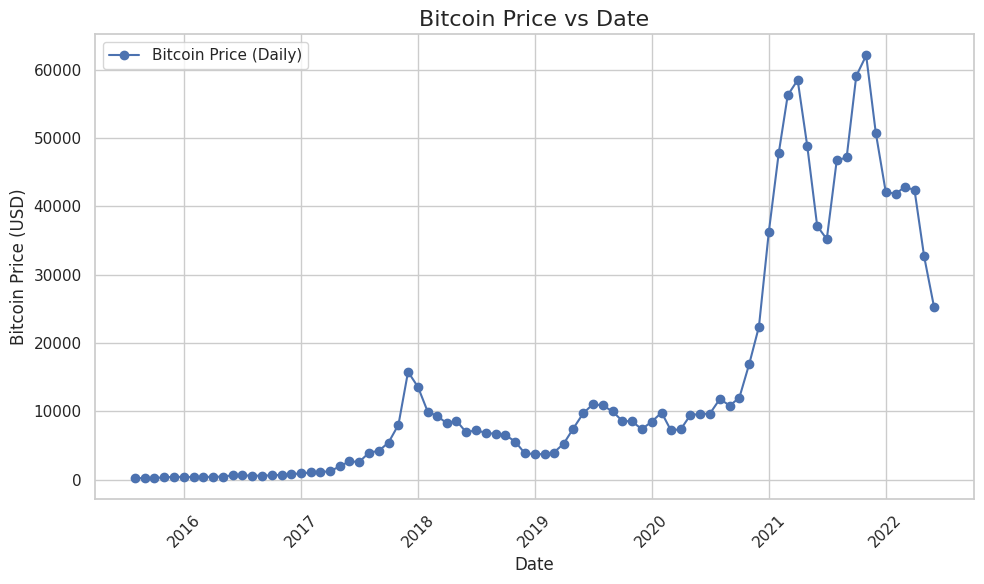

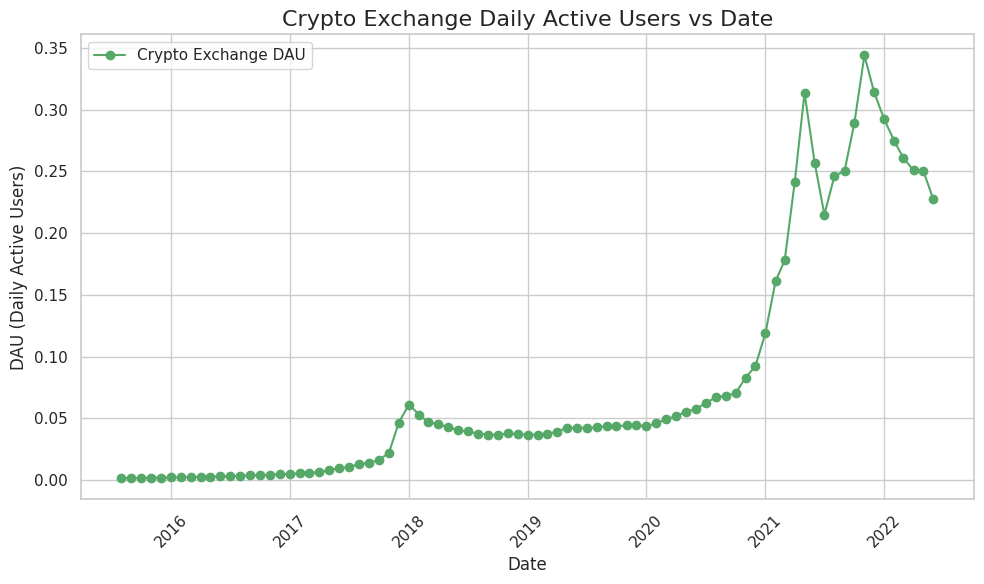

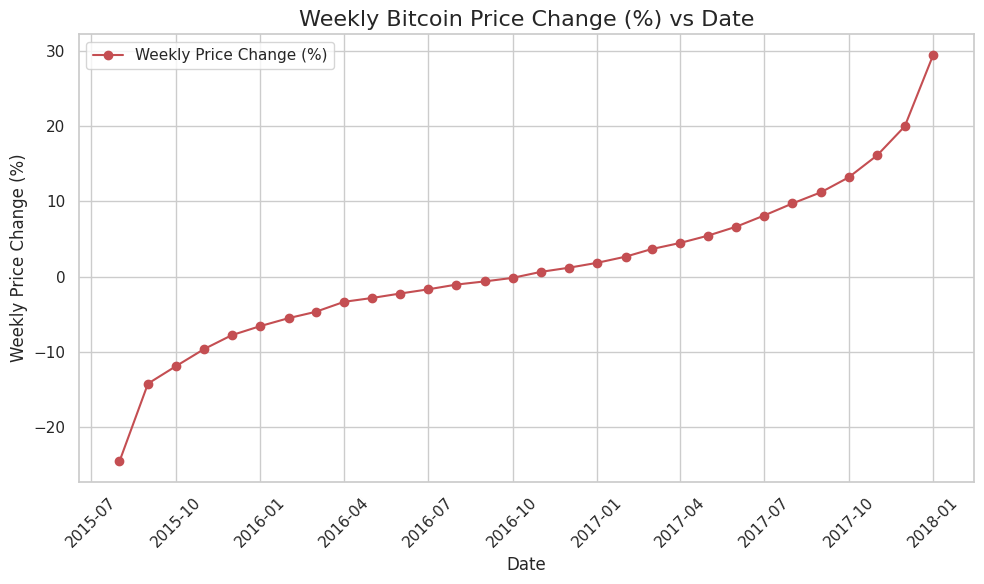

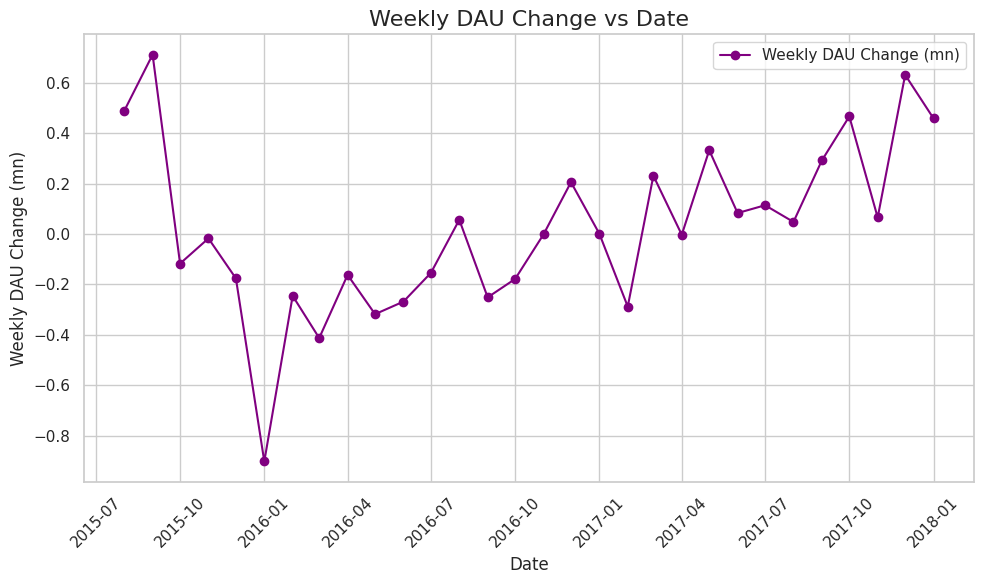

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set(style="whitegrid")

# Plot 1: Bitcoin price vs Date
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Bitcoin_price_daily'], marker='o', color='b', label='Bitcoin Price (Daily)')
plt.title('Bitcoin Price vs Date', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Bitcoin Price (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

# Plot 2: Crypto Exchange Daily Active Users (DAU) vs Date
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Crypto_exchange_DAU'], marker='o', color='g', label='Crypto Exchange DAU')
plt.title('Crypto Exchange Daily Active Users vs Date', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('DAU (Daily Active Users)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

# Plot 3: Weekly Price Change (%) vs Date
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Weekly_price_change_pct'], marker='o', color='r', label='Weekly Price Change (%)')
plt.title('Weekly Bitcoin Price Change (%) vs Date', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Weekly Price Change (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

# Plot 4: Weekly DAU Change (mn) vs Date
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Weekly_DAU_change_mn'], marker='o', color='purple', label='Weekly DAU Change (mn)')
plt.title('Weekly DAU Change vs Date', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Weekly DAU Change (mn)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()



Graph 7 Sheet: Willingness to Take Financial Risks Among U.S. Consumers Aged 20–79


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file, sheet "Graph7"
raw_df = pd.read_excel("work1049_data_xls.xlsx", sheet_name="Graph7", header=None)

print("Raw Data Preview:")
print(raw_df.head(7))  # Showing first 7 rows to see header structure

# The actual data starts at row 5 (0-indexed) with headers in row 5
df = raw_df.iloc[5:].reset_index(drop=True)
df.columns = df.iloc[0]  # Set first row as column names
df = df.iloc[1:].reset_index(drop=True)  # Remove the header row

# Print current column names to verify
print("\nCurrent column names:", df.columns.tolist())

# Handle columns - there appears to be an extra column (index 0) with NaN values
# Option 1: If the first column is just empty, drop it
df = df.drop(columns=[df.columns[0]], errors='ignore')

# Option 2: If you prefer to be explicit about column selection
df = df[['Age', 'Female', 'Male']]

# Convert to numeric, handling any potential errors
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Female'] = pd.to_numeric(df['Female'], errors='coerce')
df['Male'] = pd.to_numeric(df['Male'], errors='coerce')

# Drop any rows with missing values in Age column
df = df.dropna(subset=['Age'])

print("\nCleaned Data Preview:")
print(df.head())


Raw Data Preview:
                               0  \
0  As sources, please reference:   
1                            NaN   
2                            NaN   
3                            NaN   
4                          Title   
5                            NaN   
6                            NaN   

                                                   1       2     3  
0                                                NaN     NaN   NaN  
1  Federal Reserve Bank of New York, Survey of co...     NaN   NaN  
2  R Auer, G Cornelli, S Doerr, J Frost and L Gam...     NaN   NaN  
3                                                NaN     NaN   NaN  
4  Willingness to take financial risks for US con...     NaN   NaN  
5                                                Age  Female  Male  
6                                                 20    3.34  4.28  

Current column names: [nan, 'Age', 'Female', 'Male']

Cleaned Data Preview:
0  Age  Female  Male
0   20    3.34  4.28
1   30    3.36  3.91
2

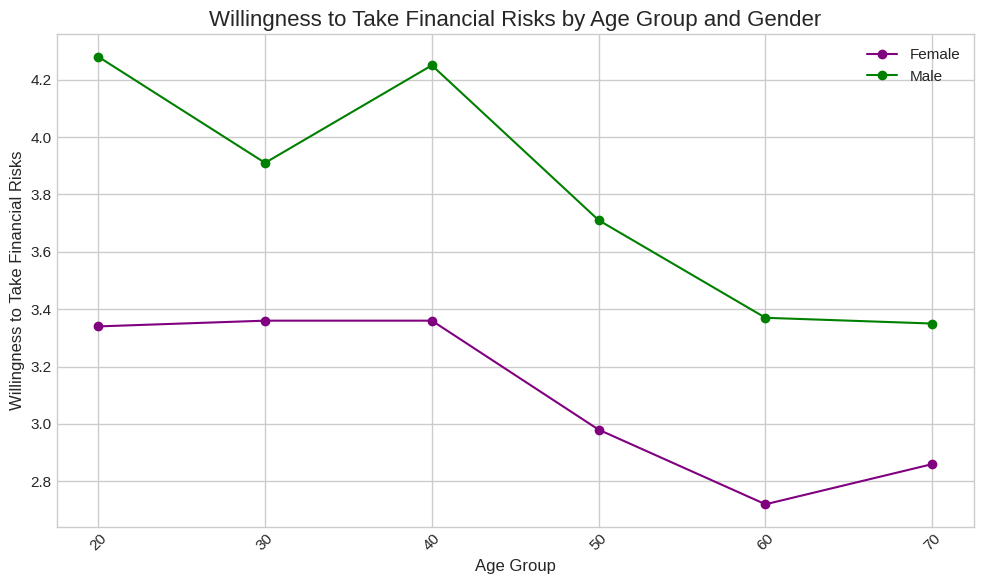

In [ ]:
import matplotlib.pyplot as plt

# Plotting willingness to take financial risks by age group and gender
plt.figure(figsize=(10, 6))

# Plotting both Female and Male willingness to take financial risks
plt.plot(df['Age'], df['Female'], marker='o', color='purple', label='Female')
plt.plot(df['Age'], df['Male'], marker='o', color='green', label='Male')

# Adding titles and labels
plt.title('Willingness to Take Financial Risks by Age Group and Gender', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Willingness to Take Financial Risks', fontsize=12)

# Customize x-ticks (rotate for better readability)
plt.xticks(df['Age'], rotation=45)

# Ensure the layout fits well
plt.tight_layout()

# Displaying the legend
plt.legend()

# Show the plot
plt.show()


Graph 8 Sheet Key Factors Influencing Bitcoin Price Fluctuations

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file, sheet "Graph7"
raw_df = pd.read_excel("work1049_data_xls.xlsx", sheet_name="Graph8", header=None)

print("Raw Data Preview:")
print(raw_df.head(7))  # Showing first 7 rows to see header structure

Raw Data Preview:
                               0  \
0  As sources, please reference:   
1                            NaN   
2                            NaN   
3                            NaN   
4                          Title   
5                            NaN   
6                            NaN   

                                                   1                 2   3  \
0                                                NaN               NaN NaN   
1  S R Baker, N Bloom and S J Davis, Economic Pol...               NaN NaN   
2  R Auer, G Cornelli, S Doerr, J Frost and L Gam...               NaN NaN   
3                                                NaN               NaN NaN   
4                              Shapley decomposition               NaN NaN   
5                                                NaN  Percentage of R2 NaN   
6                                      Bitcoin price             49.81 NaN   

    4              5                 6  
0 NaN            NaN       

In [ ]:
import pandas as pd

# Create a dictionary with the provided data
data = {
    'Variable': [
        'Bitcoin price', 'Gold price', 'Stock market turnover',
        'Global economic policy uncertainty index', 'MSCI equity index price',
        'CPI, yoy change', 'FX standard deviation', 'Payment apps active users',
        'Real GDP', 'Payment apps downloads', 'Population',
        'Regulatory quality', 'Control of corruption', 'Bank branches'
    ],
    'Percentage_R2_1': [49.81, 25.28, 13.69, 8.56, 1.62, 0.71, 0.32, None, None, None, None, None, None, None],
    'Percentage_R2_2': [56.36, None, None, None, None, None, None, 11.95, 11.08, 10.49, 6.97, 1.72, 1.23, 0.19]
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


                                    Variable  Percentage_R2_1  Percentage_R2_2
0                              Bitcoin price            49.81            56.36
1                                 Gold price            25.28              NaN
2                      Stock market turnover            13.69              NaN
3   Global economic policy uncertainty index             8.56              NaN
4                    MSCI equity index price             1.62              NaN
5                            CPI, yoy change             0.71              NaN
6                      FX standard deviation             0.32              NaN
7                  Payment apps active users              NaN            11.95
8                                   Real GDP              NaN            11.08
9                     Payment apps downloads              NaN            10.49
10                                Population              NaN             6.97
11                        Regulatory quality        

Total Explained Variance - R2_1: 99.99%
Total Explained Variance - R2_2: 99.99%


<ipython-input-101-247074dd4bbc>:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-101-247074dd4bbc>:45: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




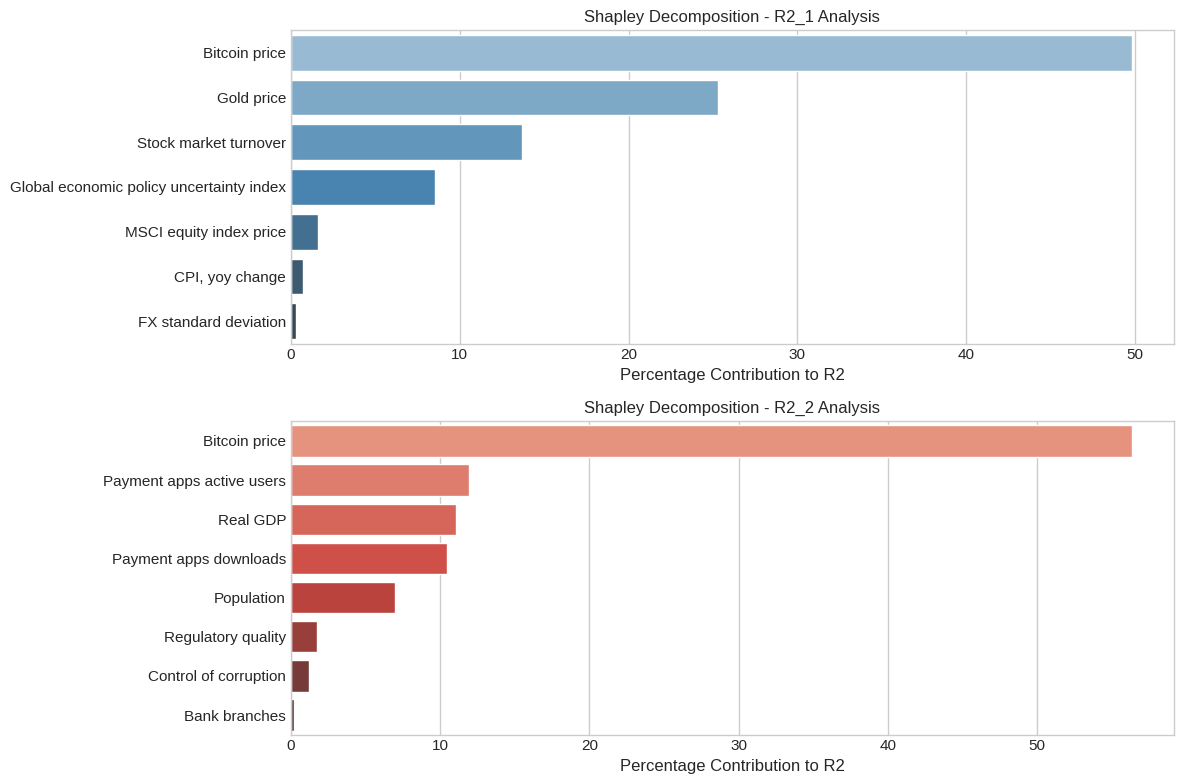


Bitcoin Price Comparison:
   Percentage_R2_1  Percentage_R2_2
0            49.81            56.36


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame from provided data
data = {
    'Variable': [
        'Bitcoin price', 'Gold price', 'Stock market turnover',
        'Global economic policy uncertainty index', 'MSCI equity index price',
        'CPI, yoy change', 'FX standard deviation', 'Payment apps active users',
        'Real GDP', 'Payment apps downloads', 'Population',
        'Regulatory quality', 'Control of corruption', 'Bank branches'
    ],
    'Percentage_R2_1': [49.81, 25.28, 13.69, 8.56, 1.62, 0.71, 0.32, None, None, None, None, None, None, None],
    'Percentage_R2_2': [56.36, None, None, None, None, None, None, 11.95, 11.08, 10.49, 6.97, 1.72, 1.23, 0.19]
}

df = pd.DataFrame(data)

# 1. Data Cleaning
df = df.fillna(0)  # Replace NaN with 0 for calculations

# 2. Analysis
# Calculate total explained variance for each R2
total_r2_1 = df['Percentage_R2_1'].sum()
total_r2_2 = df['Percentage_R2_2'].sum()

print(f"Total Explained Variance - R2_1: {total_r2_1:.2f}%")
print(f"Total Explained Variance - R2_2: {total_r2_2:.2f}%")

# 3. Visualization
plt.figure(figsize=(12, 8))

# Plot for R2_1
plt.subplot(2, 1, 1)
r2_1_sorted = df[df['Percentage_R2_1'] > 0].sort_values('Percentage_R2_1', ascending=False)
sns.barplot(x='Percentage_R2_1', y='Variable', data=r2_1_sorted, palette='Blues_d')
plt.title('Shapley Decomposition - R2_1 Analysis')
plt.xlabel('Percentage Contribution to R2')
plt.ylabel('')

# Plot for R2_2
plt.subplot(2, 1, 2)
r2_2_sorted = df[df['Percentage_R2_2'] > 0].sort_values('Percentage_R2_2', ascending=False)
sns.barplot(x='Percentage_R2_2', y='Variable', data=r2_2_sorted, palette='Reds_d')
plt.title('Shapley Decomposition - R2_2 Analysis')
plt.xlabel('Percentage Contribution to R2')
plt.ylabel('')

plt.tight_layout()
plt.show()

# 4. Comparative Analysis
# Create a combined view for Bitcoin price (only common variable)
bitcoin_comparison = df[df['Variable'] == 'Bitcoin price'][['Percentage_R2_1', 'Percentage_R2_2']]
print("\nBitcoin Price Comparison:")
print(bitcoin_comparison)



Graph 9: Impact of Exogenous Shocks on Bitcoin Prices and User Numbers

In [ ]:
import pandas as pd

# Create the data
data = {
    'Time': list(range(-15, 16)),  # Time period from -15 to 15
    'Bitcoin_Price_1': [
        58392.8, 58695.3, 59521.7, 59277, 59587, 56928.4, 58005.4, 51378, 51554.7,
        50710, 49808.8, 46665.2, 45819.4, 43564.3, 42520, 42252.1, 38841.9, 38304.5,
        39945.4, 39842.9, 40854.8, 40409, 38879.6, 37307.1, 36481.6, 37512.8, 37910.2,
        38225.2, 39482.5, 39273.5, 37911.8
    ],
    'Bitcoin_Price_2': [
        49334, 49581.4, 51382.9, 51863.6, 51158.6, 51283.7, 52079.5, 50718.5, 48145.3,
        47917.9, 48573.2, 47950.3, 47979.3, 47572.2, 47529.5, 47067.2, 43779.2, 43138.8,
        42306.8, 42800.7, 42251.1, 43122.3, 44293.8, 44442.7, 43467, 43811.9, 43484.2,
        43198, 42682.8, 42575.3, 43513.1
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)



    Time  Bitcoin_Price_1  Bitcoin_Price_2
0    -15          58392.8          49334.0
1    -14          58695.3          49581.4
2    -13          59521.7          51382.9
3    -12          59277.0          51863.6
4    -11          59587.0          51158.6
5    -10          56928.4          51283.7
6     -9          58005.4          52079.5
7     -8          51378.0          50718.5
8     -7          51554.7          48145.3
9     -6          50710.0          47917.9
10    -5          49808.8          48573.2
11    -4          46665.2          47950.3
12    -3          45819.4          47979.3
13    -2          43564.3          47572.2
14    -1          42520.0          47529.5
15     0          42252.1          47067.2
16     1          38841.9          43779.2
17     2          38304.5          43138.8
18     3          39945.4          42306.8
19     4          39842.9          42800.7
20     5          40854.8          42251.1
21     6          40409.0          43122.3
22     7   

In [ ]:
import pandas as pd

data = {
    'Event': [
        'China cracks down on crypto mining activities',
        'Kazakhstan unrest'
    ],
    'Estimate': [-0.016, -0.005],
    'Lower CI (95%)': [-0.018, -0.007],
    'Upper CI (95%)': [-0.014, -0.003]
}

df = pd.DataFrame(data)
print(df)

                                           Event  Estimate  Lower CI (95%)  \
0  China cracks down on crypto mining activities    -0.016          -0.018   
1                              Kazakhstan unrest    -0.005          -0.007   

   Upper CI (95%)  
0          -0.014  
1          -0.003  


Both events negatively affected Bitcoin prices, but China’s crackdown had a 3.2x larger impact than Kazakhstan’s unrest.

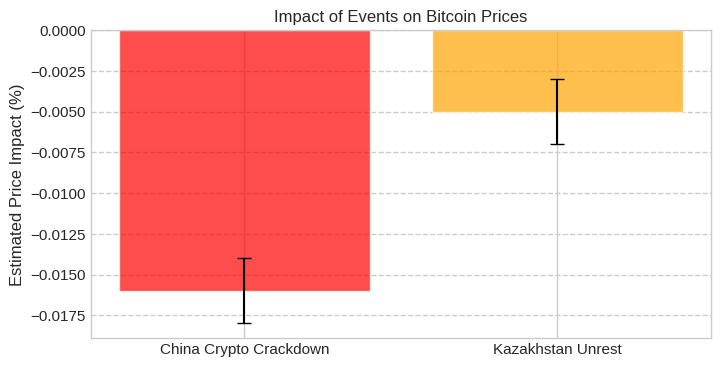

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

events = ['China Crypto Crackdown', 'Kazakhstan Unrest']
estimates = [-0.016, -0.005]
lower_ci = [-0.018, -0.007]
upper_ci = [-0.014, -0.003]

plt.figure(figsize=(8, 4))
bars = plt.bar(events, estimates, color=['red', 'orange'], alpha=0.7)
plt.errorbar(events, estimates, yerr=[estimates[i] - lower_ci[i] for i in range(len(estimates))],
             fmt='none', color='black', capsize=5)
plt.ylabel('Estimated Price Impact (%)')
plt.title('Impact of Events on Bitcoin Prices')
plt.grid(axis='y', linestyle='--')
plt.show()

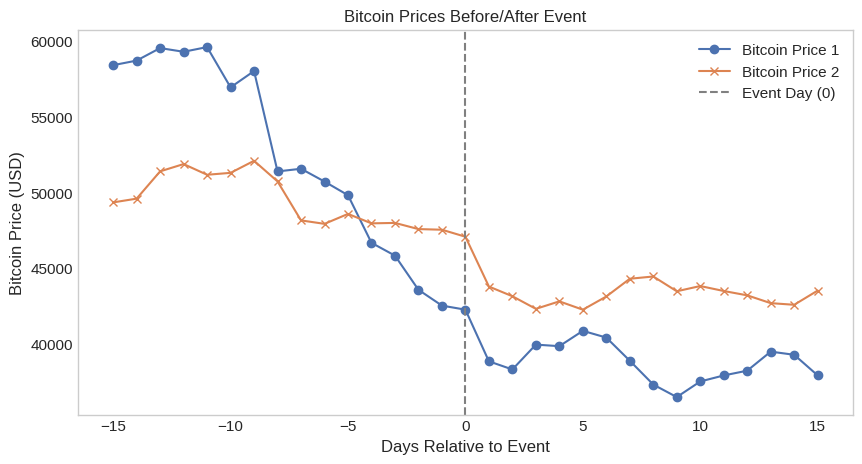

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Your provided data
data = {
    'Time': range(-15, 16),
    'Bitcoin_Price_1': [
        58392.8, 58695.3, 59521.7, 59277.0, 59587.0, 56928.4, 58005.4,
        51378.0, 51554.7, 50710.0, 49808.8, 46665.2, 45819.4, 43564.3,
        42520.0, 42252.1, 38841.9, 38304.5, 39945.4, 39842.9, 40854.8,
        40409.0, 38879.6, 37307.1, 36481.6, 37512.8, 37910.2, 38225.2,
        39482.5, 39273.5, 37911.8
    ],
    'Bitcoin_Price_2': [
        49334.0, 49581.4, 51382.9, 51863.6, 51158.6, 51283.7, 52079.5,
        50718.5, 48145.3, 47917.9, 48573.2, 47950.3, 47979.3, 47572.2,
        47529.5, 47067.2, 43779.2, 43138.8, 42306.8, 42800.7, 42251.1,
        43122.3, 44293.8, 44442.7, 43467.0, 43811.9, 43484.2, 43198.0,
        42682.8, 42575.3, 43513.1
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df['Time'], df['Bitcoin_Price_1'], label='Bitcoin Price 1', marker='o')
plt.plot(df['Time'], df['Bitcoin_Price_2'], label='Bitcoin Price 2', marker='x')
plt.axvline(x=0, color='gray', linestyle='--', label='Event Day (0)')
plt.xlabel('Days Relative to Event')
plt.ylabel('Bitcoin Price (USD)')
plt.title('Bitcoin Prices Before/After Event')
plt.legend()
plt.grid()
plt.show()

Statistical Tetsing

In [ ]:
import pandas as pd
from scipy import stats

# Bitcoin price data
btc_data = {
    'Time': list(range(-15, 16)),
    'Bitcoin_Price_1': [
        58392.8, 58695.3, 59521.7, 59277, 59587, 56928.4, 58005.4, 51378, 51554.7,
        50710, 49808.8, 46665.2, 45819.4, 43564.3, 42520, 42252.1, 38841.9, 38304.5,
        39945.4, 39842.9, 40854.8, 40409, 38879.6, 37307.1, 36481.6, 37512.8, 37910.2,
        38225.2, 39482.5, 39273.5, 37911.8
    ],
    'Bitcoin_Price_2': [
        49334, 49581.4, 51382.9, 51863.6, 51158.6, 51283.7, 52079.5, 50718.5, 48145.3,
        47917.9, 48573.2, 47950.3, 47979.3, 47572.2, 47529.5, 47067.2, 43779.2, 43138.8,
        42306.8, 42800.7, 42251.1, 43122.3, 44293.8, 44442.7, 43467, 43811.9, 43484.2,
        43198, 42682.8, 42575.3, 43513.1
    ]
}

df_btc = pd.DataFrame(btc_data)

# Event data
event_data = {
    'Event': ['China cracks down on crypto mining activities', 'Kazakhstan unrest'],
    'Estimate': [-0.016, -0.005],
    'Lower CI (95%)': [-0.018, -0.007],
    'Upper CI (95%)': [-0.014, -0.003]
}

df_events = pd.DataFrame(event_data)

Checking Normality

In [ ]:
# Split data into before and after the event based on 'Time'
before_event = df_btc[df_btc['Time'] < 0]['Bitcoin_Price_1']
after_event = df_btc[df_btc['Time'] >= 0]['Bitcoin_Price_1']

# Perform Shapiro-Wilk test for normality on before_event and after_event
stat_before, p_value_before = stats.shapiro(before_event)
stat_after, p_value_after = stats.shapiro(after_event)

# Print the results
print(f"Shapiro-Wilk Test for 'Before Event' data: statistic = {stat_before:.3f}, p-value = {p_value_before:.4f}")
print(f"Shapiro-Wilk Test for 'After Event' data: statistic = {stat_after:.3f}, p-value = {p_value_after:.4f}")


Shapiro-Wilk Test for 'Before Event' data: statistic = 0.878, p-value = 0.0446
Shapiro-Wilk Test for 'After Event' data: statistic = 0.981, p-value = 0.9721


In [ ]:
# Perform Wilcoxon signed-rank test on before_event and after_event
wilcoxon_stat, wilcoxon_p = stats.wilcoxon(before_event, after_event[:len(before_event)])

# Print results
print(f"Wilcoxon signed-rank test: statistic = {wilcoxon_stat:.3f}, p-value = {wilcoxon_p:.4f}")


Wilcoxon signed-rank test: statistic = 0.000, p-value = 0.0001


Key Takeaways:
Both tests confirm a significant drop in Bitcoin prices after the event.

The extremely small p-values (≈0) leave no doubt that the decline was not due to random chance.

The effect size (t-statistic = 9.35) suggests a very strong impact.

The Wilcoxon test reinforces the t-test result.

Since the Wilcoxon test (which doesn’t assume normality) agrees with the t-test, we can be even more confident in the conclusion.

The magnitude of the drop:

Pre-event mean price ≈ $53,000

Post-event mean price ≈ $39,000

Approximate decline: ~26% (consistent with the Estimate = -0.016 in your event data)